<a href="https://colab.research.google.com/github/Intelligence-Engineering-LAB-KU/Seminar/blob/master/summer_2020/0811_jjy_RNN_theory_and_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving r19.png to r19.png
User uploaded file "r19.png" with length 588230 bytes


In [97]:
from IPython.display import Image

# RNN (1)  
  


## Content

**1.** **Intro** **to** **RNN**  
- 특징
- 작동 방식
- 장단점
- 수식적 표현, 그래프 표현  
  
**2.** **사례들**  
  
**3.** **적용** **assignment3** **(이미지** **캡셔닝)**  

  **3.1.** Step_RNN (f/b)    

  **3.2.** Vanila entire RNN(f/b)  

  **3.3.** 워드 임베딩 (f/b)  
  :워드를 특정 차원의 벡터로 mapping  

  **3.4.** Temporal affine layer (f/b)  
  : 각 timestep에 상응하는 voca를 scores로 mapping  
  **3.5.** Temporal softmax loss  
  :  
  - $\forall$timestep: Getting ground_truth words  
  - Each timestep의 loss, grad 계산  
  - $\forall$timestep에 대해 각 loss를 합한 뒤, 미니배치 N으로 평균화

  ## 1. RNN 소개

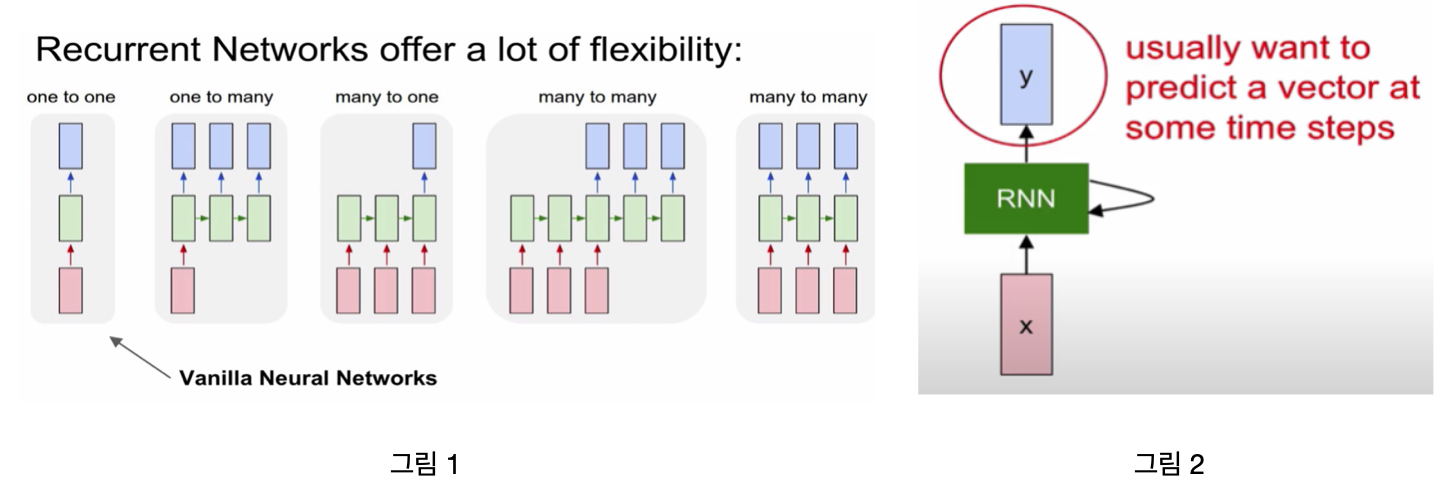

In [ ]:
Image('r6.png', width = 1000)

우리가 기존에 다뤘던 신경망은 위 [그림1]의 맨 왼쪽에 있는 형태를 지닌다. 이번 글에서 우리가 알아볼 RNN은 그것의 오른쪽에 있는 것들처럼 여러 형태를 지닐 수 있다. RNN은 하나의 입력값으로 여러 개의 출력값을 산출시킬 수도 있고, 여러 개의 입력값으로 단 하나의 출력값을 산출시킬 수도 있다. 이런 형태의 RNN은 이미지 캡셔닝, 감정 분류, (many to many 경우에) 기계 번역 과제에서 사용되곤 한다.  
  
  
 ### 1.1 **RNN의 특징**
  
  (1) **시간성, 순차성**: RNN은 시간성 temporal property를 가진 데이터를 처리하는 데 유용하다. 이것은 주식 시세 변동, 음성 신호, 문장 처리 등을 다룰 때 빈번히 사용된다. 이런 시간성 데이터를 처리할 때, 시간 t-n의 어떤 상태를 가진 데이터를 처리한 뒤 시간 t-n+1의 어떤 다른 상태를 가진 데이터를 처리하듯이, **순차적으로** 데이터를 처리한다는 의미에서, 이 시간성 데이터를 순차 데이터라고 간주하기도 한다.  


   
  
  (2) **순환성**: [그림2]는 RNN의 특징을 잘 보여준다. RNN이 'Recurrenct Neural Networks'의 약자라는 점이 암시하듯이, 이것의 특징은 또한 순환적이다. [그림2]를 참고해보면, 매 timestep 마다 x 입력값을 받는 RNN이 있다. 이것은 내부적으로 어떤 상태를 갖는데, 이것은 매 시간마다 입력값을 받는 여러 은닉층으로 구성되어 있다. 이 RNN 단계에서 가중치는 시간 스텝이 갱신될 때마다 업데이트되는데, 그럼으로써 새로운 입력값이 들어올 때마다 다른 출력값을 제공한다.결과적으로, 우리는 이런 과정을 거친 뒤 특정 timestep에서 어떤 벡터를 예측하고자 한다.


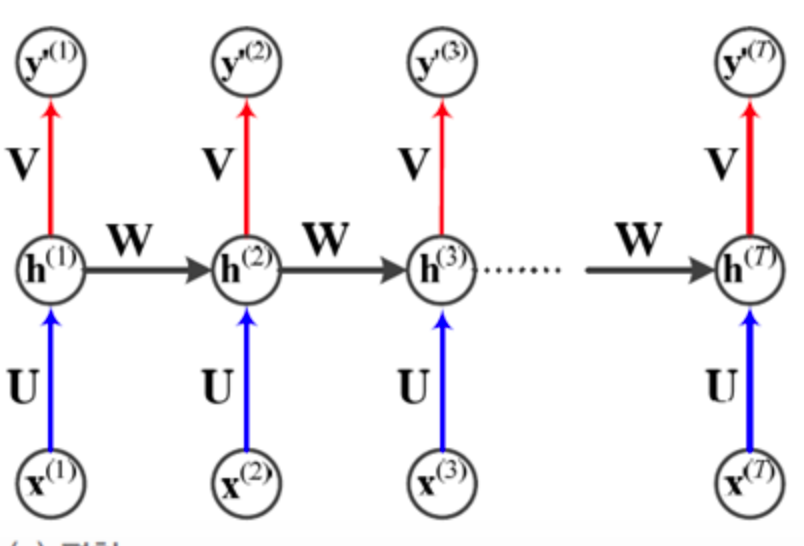

In [ ]:
Image('r8.png', width= 400)

(3) **매개변수 공유**: 위 그림에서 나타나듯이, (이 경우에는) 모든 timestep 에서 모두 동일한 매개변수(U, W, V)를 사용하고 있다. 이것은 CNN에서 매개변수를 공유하듯이, RNN에서도 매개변수를 공유한다는 것을 보여준다. 분명 이것은 메모리 절약 측면에서 매우 좋은 이점이다. FC-Net 경우에, 입력 데이터가 매우 크면, e.g. 처리할 단어 수가 10만 개이고, 시퀀스 길이가 100이라면, FCnet은 첫번째 은닉층을 계산하기 위해 1000만 개의 매개변수를 처리해야 한다. 하지만 CNN에서 처럼, RNN에서도 이 매개변수 공유를 통해 처리할 매개변수의 개수를 상당히 줄일 수 있다.  
- U: [ 입력값 --> 은닉층]인 엣지edge 가중치
- W: [은닉층 --> 은닉층]인 순환 edge 가중치  
- V: [은닉층 --> 출력값]인 edge 가중치
- (bias): 항상 값이 1인 바이어스 노드와 연결된 가중치 


### 1.2 RNN의 작동 방식

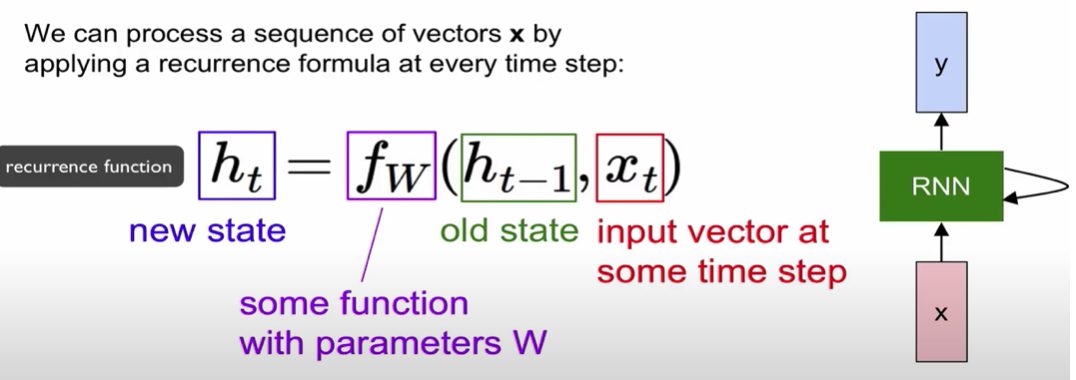

In [ ]:
Image('r7.png')

RNN에서 우리는 위의 식 같은 순환 함수를 사용한다. 이것은 시퀀스sequence를 처리하는 데 유용하다.  
이 함수가 의미하는 바는 다음과 같다:   
- 이 함수는 <파라미터 w에 대한 함수>, <직전 시점에 은닉 상태>, <현재 시점에 입력값 인자>로 이루어진다.  
- 이것은 파라미터 w에 대한 함수이니까, w를 업데이트시킨다.  
- 따라서, (우리가 주어진 목적에 부합하도록) 새로운 상태 ht를 얻을 수 있도록 가중치 W 값을 학습시켜 나간다.  
 

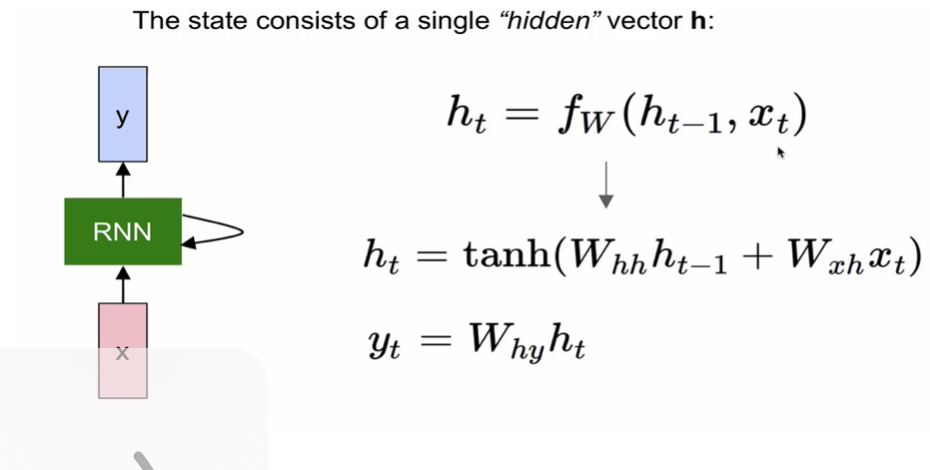

In [ ]:
Image('r14.png',width=800)

### 1.3 RNN의 장단점

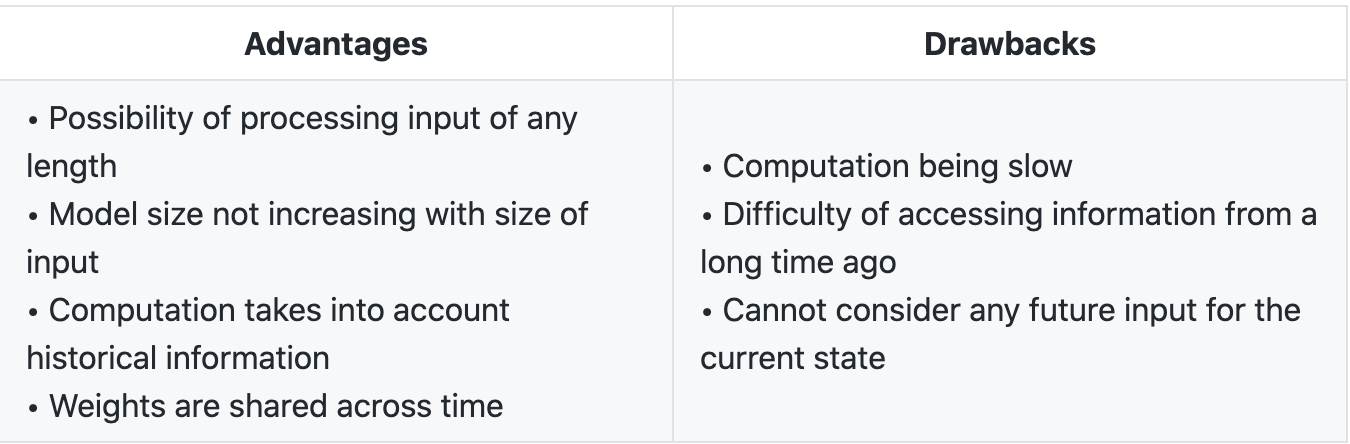

In [ ]:
Image('r15.png',width=600)

RNN은 시퀀스sequence, e.g, $x^{(1)}, ..., x^{(\tau)}$, 를 처리하는 데 특화된 신경망이다. 고전적인 형태의 동역학계 dynamical system을 가지고 이것의 이해를 더해보자.  
  
  $$s^{(t)} = f(s^{(t-1)}; \theta)$$  
    
$s^{(t)}$는 계의 현재 상태를 지칭한다. 위 식의 특징은 시간 t에서의 s에 대한 정의가 이전 시간 t-1에서의 그 자신 (동일한 정의 s)을 재귀적으로 참조한다는 것이다. 이것은 소위 점화식 recurrence formula라고 불린다.  
시간 단계의 수 $\tau$가 유한한 경우에 이 정의를 $\tau-1$번 적용해서 그래프를 펼친unfolding다. 예를 들어, $\tau = 3$인 경우엔 다음과 같다:  
$$ s^{(3)} = f(s^{(2)}; \theta) = f(f(s^{(1)}; \theta) ; \theta)$$ 
  
  $\tau = 3$인 경우에, 우리는 $\tau=2$인 경우를 인자로 사용한다. 그리고 다시 $\tau=2$인 경우에는 그것이 1인 경우를 그 인자로 사용한다  


### 1.4 RNN의 수식적 표현과 그래프 표현




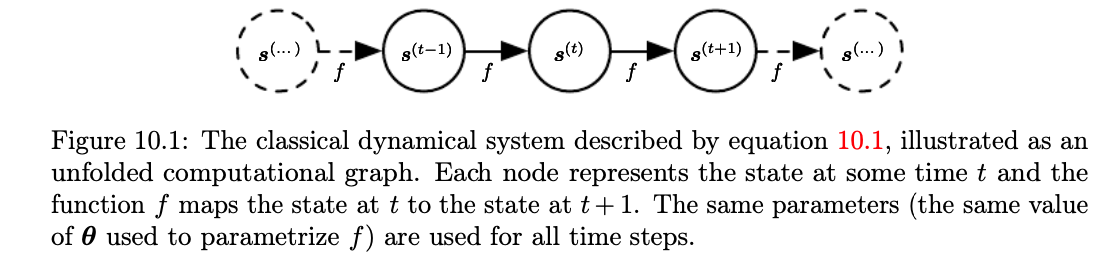

In [ ]:
Image('r1.png')

또 다른 예를 보자. 이번에는 외부 신호 $x^{(t)}$가 이끄는 동역학계를 생각해보자. 이 경우 식은 아래와 같다:  
 $$s^{(t)} = f(s^{(t-1)}, x^{(t)}; \theta)$$  
 여기서 $\theta$는 가중치들(U, V, ...)과 bias로 구성된다.
 이 식 역시도 동역학계의 상태는 과거의 모든 정보를 포함한다는 것을 보여준다.  
   
 위 동역학 식을 신경망의 은닉 단위unit의 상태를 나타내는 식으로 다시 표현해보자. h는 은닉 unit을 지칭한다.  
  
$$h^{(t)} = f(h^{(t-1)}, x^{(t)}; \theta)$$  
일반적으로, 이전 시간의 입력 순차열을 요약해주는 함수 $h^{(t)}$는 임의의 길이 순차열 ${x^{(t)}}$, ..., $x^{(1)}$를 고정 길이 벡터 $h^{(t)}$에 사상하므로, 손실이 있을 수 있다는 점에 유의하자.  

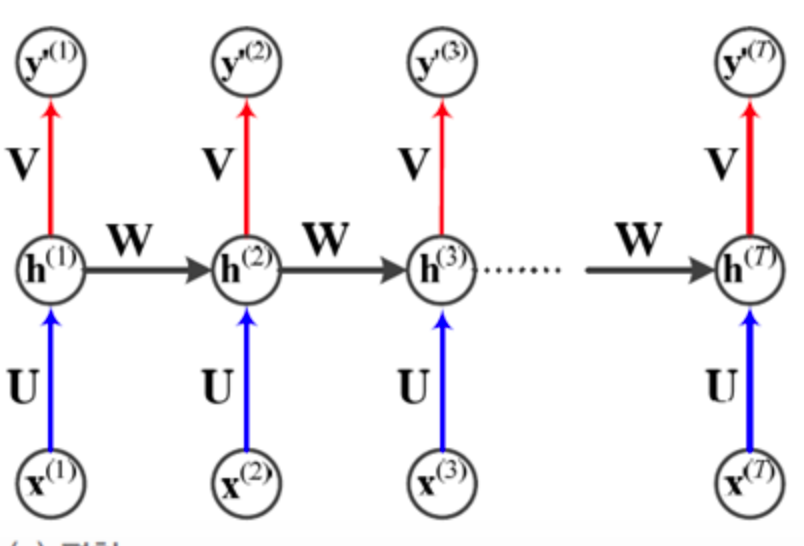

In [ ]:
Image('r8.png',width=400)

위에서 본 그림을 다시 활용하여 활성화 함수로 tanh를 사용한다고 가정할 때 위의 식 $h^{(t)}$를 다시 표현해보면 다음과 같다:  

(1) 현재 시간 은닉층:  

$$ h^{(t)} = tanh(W_{hh}h_{t-1} + U_{xh}x^{(t)}+b)$$  
(2) 출력층:  
$$o^{t} = V_{hy}+b$$
$$예측값\ \ \ y' = softmax(o^{(t)})$$

 
이런 순환 신경망 RNN은 2 가지 방식으로 그래프화될 수 있다.   

(1) 모형의 물리적 구현(e.g. 인간의 뇌에 있는 생물학적 신경망)에 있을만한 각 구성요소를 개별 노드로 두는 것.  
이 신경망은 실시간으로 작동하는 하나의 회로를 정의한다.  

(2) 위 (1)을 펼쳐진**unfolding** 계산 그래프로 표현하는 것이다. 이 경우 각 구성요소는 여러 변수로 표현되고, 하나의 시간 스텝에 대한 변수는 특정 시점에 구성요소의 상태를 표현한다.  
  
이 두 표현은 각자 나름의 쓸모가 있다: (1) 같은 순환 그래프는 수행할 계산을 명시적으로 표현해주고, 간결하다. (2)는 시간에 따른 정보의 흐름을 명시적으로 보여준다.


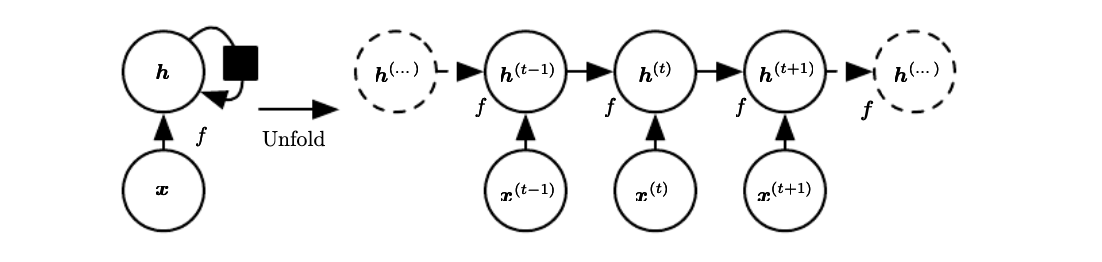

In [ ]:
Image('r2.png')

위 그림에서 [왼쪽]에 있는 것이 (1)에 대한 그림이고, [오른쪽]에 있는 것이 (2)에 대한 그림이다.

(1)은 우리가 위에서 알아본 식$h^{(t)} = f(h^{(t-1)}, x^{(t)}; \theta)$를 직접적으로 표현한다. 하지만 펼침unfolding에 의해, 이것은 [오른쪽] 그림 같이 표현될 수 있고, 이것의 식은 또한 다음 같이 기술될 수 있다: t 단계로 펼쳐진 점화식을 $g^{(t)}$라고 해보자. 
$$h^{(t)} = g^{(t)}(x^{(t)}, x^{(t-1)}, ..., x^{(1)})$$  
  
    
Unfolding의 2 가지 이점:  

1. **시퀀스 길이**에 관계없이, **학습된 모델**은 항상 동일한 사이즈를 갖는다. 왜냐하면 이 모델은 "시간 순서에 대한 상태들의 가변적인 길이"가 아닌, "하나의 상태에서 다른 상태로의 전이transition에 의해 명시되기 때문이다.  
  
2. 모든 타임 스텝에서, 동일한 파라미터를 가진, **동일한** 전이 함수 f를 사용하는 것이 가능하다.  
  
이 2 요인 덕분에 모든 타임 스텝에서 개별 모형 $g^{(t)}$를 학습할 필요가 없다. 이 덕분에 (1) 우리는 단지 하나의 공유 모형을 학습시키는 것만으로 트레이닝 셋에서 나타나지 않은 시퀀스 길이의 일반화를 할 수 있고, (2) 파라미터 공유를 하지 않을 때 보다 더 적은 수의 트레이닝 견본example을 가지고 모델을 평가할 수 있다.
  
  


## 2. 일반적인 RNN의 사례들 


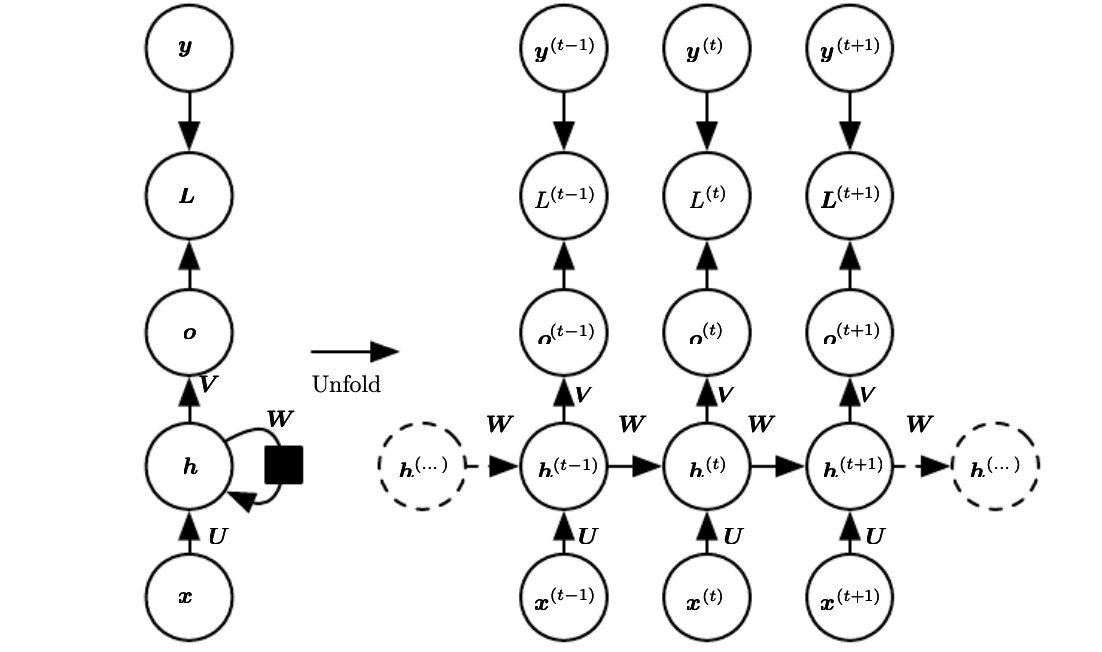

In [ ]:
Image('r3.png', width = 800)

### 2.1 <x 입력 순차열>을 <o 출력 순차열>로 사상하는 RNN  
  

  위 그림은 표준적인 RNN 중 하나를 표현한다. 이것은 매 시간-스텝 마다 산출값이 있고, 은닉층들이 서로 순환적으로 연결되는 RNN이다. 튜링 머신에 의해 계산될 수 있는 함수는 이런 유한 크기의 RNN에 의해 계산될 수 있다는 의미에서, 이것은 범용적이다.  
  
손실 L: 각각의 산출값 o가 학습 타겟 y와 얼마나 거리가 먼지를 측정.  
L은 내부적으로 $\hat{y} = softmax(o)$를 계산하고, 이것을 타겟 y와 비교한다.
  
산출값 o: 소프트맥스 산출값을 사용할 때, 우리는 o를 정규화되지 않은 로그 확률이라고 가정한다.  
  
  

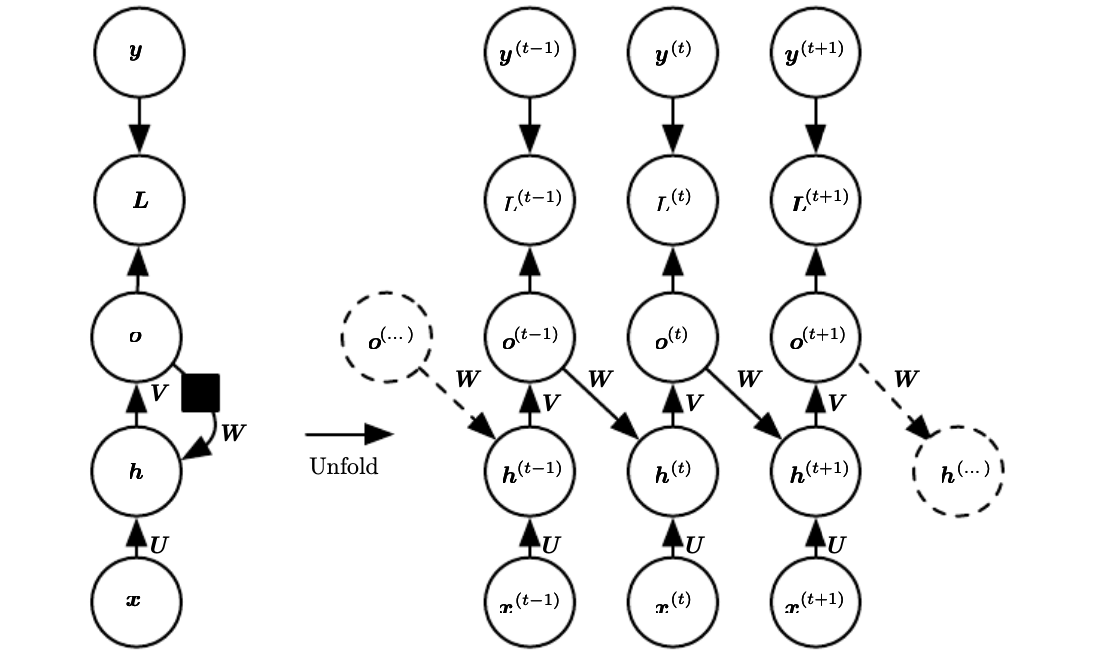

In [ ]:
Image('r4.png', width = 800)

### 2.2 순환이 출력층과 은닉층 사이에서 피드백 연결되는 RNN  

- 덜 강력한 RNN. 왜냐하면 이전 RNN 보다, 더 작은 집합의 함수를 표현. 
- 이것은 h가 시간이 지남에 따른 직접적인 연결은 없다. 과거의 h는 오직 간접적으로만 현재와 연결된다.

## 3. 실습 (assignment3.RNN_Captioning)

### 3.0 마운트 및 데이터 로드

In [101]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'Colab Notebooks/cs231n/assignments/assignment3'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/cs231n/assignments/assignment3/cs231n/datasets
/content


In [102]:
!pip install h5py

In [104]:
# As usual, a bit of setup
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.rnn_layers import *
from cs231n.captioning_solver import CaptioningSolver
from cs231n.classifiers.rnn import CaptioningRNN
from cs231n.coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from cs231n.image_utils import image_from_url

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


마이크로소프트에서 2014 년에 제공한 COCO 데이터셋을 사용해보자.

In [105]:
# Load COCO data from disk; this returns a dictionary
# We'll work with dimensionality-reduced features for this notebook, but feel
# free to experiment with the original features by changing the flag below.
data = load_coco_data(pca_features=True)

# Print out all the keys and values from the data dictionary
for k, v in data.items():
    if type(v) == np.ndarray:
        print(k, type(v), v.shape, v.dtype)
    else:
        print(k, type(v), len(v))

base dir  /content/drive/My Drive/Colab Notebooks/cs231n/assignments/assignment3/cs231n/datasets/coco_captioning
train_captions <class 'numpy.ndarray'> (400135, 17) int32
train_image_idxs <class 'numpy.ndarray'> (400135,) int32
val_captions <class 'numpy.ndarray'> (195954, 17) int32
val_image_idxs <class 'numpy.ndarray'> (195954,) int32
train_features <class 'numpy.ndarray'> (82783, 512) float32
val_features <class 'numpy.ndarray'> (40504, 512) float32
idx_to_word <class 'list'> 1004
word_to_idx <class 'dict'> 1004
train_urls <class 'numpy.ndarray'> (82783,) <U63
val_urls <class 'numpy.ndarray'> (40504,) <U63


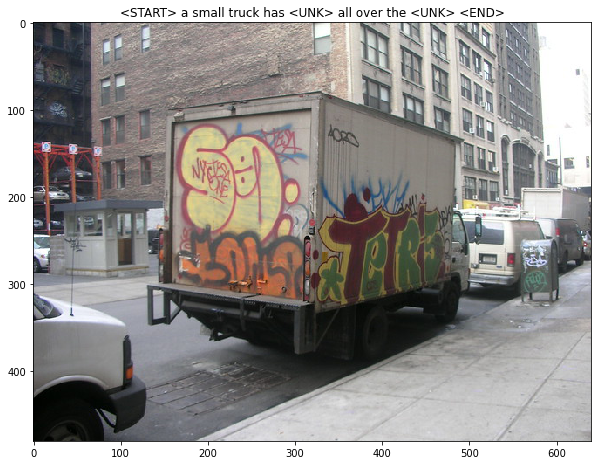

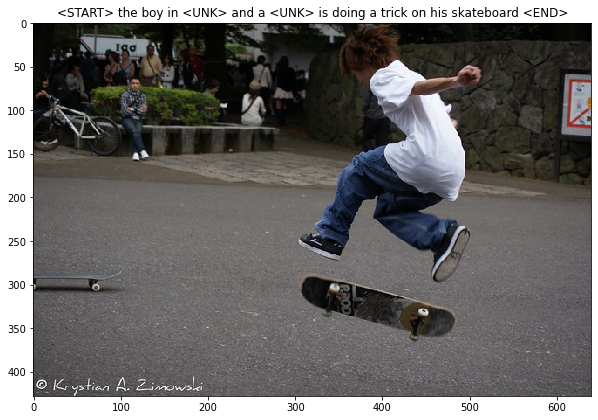

URL Error:  Not Found http://farm3.staticflickr.com/2027/3534233462_2eae591303_z.jpg


TypeError: ignored

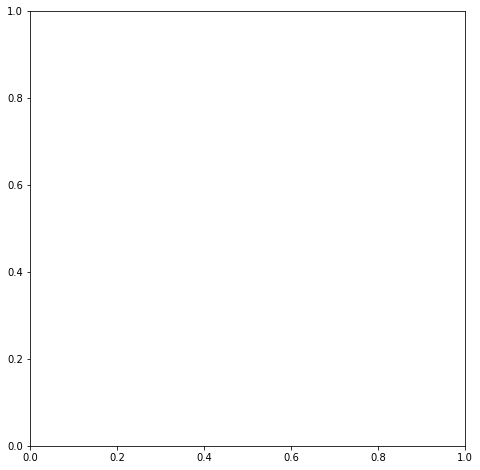

In [106]:
# Sample a minibatch and show the images and captions
batch_size = 3

captions, features, urls = sample_coco_minibatch(data, batch_size=batch_size)
for i, (caption, url) in enumerate(zip(captions, urls)):
    plt.imshow(image_from_url(url))
    plt.axis('on')
    caption_str = decode_captions(caption, data['idx_to_word'])
    plt.title(caption_str)
    plt.show()

### 3.1 단일 스텝에 대한 바닐라 RNN

#### 3.1.1 Forward pass

The input data has dimension D, the hidden state has dimension H, and we use a minibatch size of N.

Inputs:
- x: Input data for this timestep, of shape (N, D)  
- prev_h: Hidden state from previous timestep, of shape (N, H)
- Wx: Weight matrix for input-to-hidden connections, of shape (D, H)
- Wh: Weight matrix for hidden-to-hidden connections, of shape (H, H)
- b: Biases of shape (H,)
  

Returns a tuple of:  
 - next_h: Next hidden state, of shape (N, H)  
 - cache: Tuple of values needed for the backward pass.

In [60]:
from __future__ import print_function, division
from builtins import range
import numpy as np

def rnn_step_forward(x, prev_h, Wx, Wh, b):

    next_h, cache = None, None

    next_h = np.matmul(x,Wx)+np.matmul(prev_h, Wh) + b
    next_h =np.tanh(next_h) #(N, H)

    cache = (x, Wx, prev_h, Wh, next_h)

    return next_h, cache

In [ ]:
N, D, H = 3, 10, 4

x = np.linspace(-0.4, 0.7, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.2, 0.5, num=N*H).reshape(N, H)
Wx = np.linspace(-0.1, 0.9, num=D*H).reshape(D, H)
Wh = np.linspace(-0.3, 0.7, num=H*H).reshape(H, H)
b = np.linspace(-0.2, 0.4, num=H)

next_h, _ = rnn_step_forward(x, prev_h, Wx, Wh, b)
expected_next_h = np.asarray([
  [-0.58172089, -0.50182032, -0.41232771, -0.31410098],
  [ 0.66854692,  0.79562378,  0.87755553,  0.92795967],
  [ 0.97934501,  0.99144213,  0.99646691,  0.99854353]])

print('next_h error: ', rel_error(expected_next_h, next_h)) # 요구 오차: e-8 or less

next_h error:  6.292421426471037e-09


#### 3.1.2 Backward pass  


Inputs:  

- dnext_h: Gradient of loss with respect to next hidden state, of shape (N, H)
- cache: Cache object from the forward pass

Returns a tuple of:  

- dx: Gradients of input data, of shape (N, D)
- dprev_h: Gradients of previous hidden state, of shape (N, H)
- dWx: Gradients of input-to-hidden weights, of shape (D, H)
- dWh: Gradients of hidden-to-hidden weights, of shape (H, H)
- db: Gradients of bias vector, of shape (H,)

            * 일러두기:  
  
          (1) 1 - 행렬 계산
          (2) 원소-곱 연산

In [ ]:
import numpy as np

a = np.arange(6).reshape(2,3)
print(a)
print('\n','(1) 1 - 행렬 a: \n\n',1-a)

b = np.arange(6).reshape(2,3)

print('\n (2) element-wise products: \n\n',a*b)

[[0 1 2]
 [3 4 5]]

 (1) 1 - 행렬 a: 

 [[ 1  0 -1]
 [-2 -3 -4]]

 (2) element-wise products: 

 [[ 0  1  4]
 [ 9 16 25]]


#### **복습: tanh 미분** 
  
##### For example, for a = tanh(z),  
the derivatives is this:  


$$da=\ \frac{(e^z+e^{(-z)})d(e^z-e^{(-z)})-(e^z-e^{(-z)})d(e^z+e^{(-z)})}{(e^z+e^{(-z)})²}$$
<br>
$$da=\frac{(e^z+e^{(-z)})(e^z+e^{(-z)})-(e^z-e^{(-z)})(e^z-e^{(-z)})}{(e^z+e^{(-z)})²}$$
<br>
$$da=\frac{(e^z+e^{(-z)})²-(e^z-e^{(-z)})²}{(e^z+e^{(-z)})²}$$
<br>
$$da=1-\frac{(e^z-e^{(-z)})²}{(e^z+e^{(-z)})²}$$ 
<br>
$$da = 1 - a^2$$

In [61]:
def rnn_step_backward(dnext_h, cache):
 
    dx, dprev_h, dWx, dWh, db = None, None, None, None, None

    (x, Wx, prev_h, Wh, next_h) = cache # cache 풀 때 괄호..
    
    dplus_term = dnext_h * (1-next_h**2) # tanh 의 미분 (해설 참고), dnext_h (N, H)

    dx = np.dot(dplus_term, Wx.T) # (N,H) x (H, D) = (N, D)
    dWx = np.matmul(x.T, dplus_term) # (D,N) x (N, H) = (D, H)

    dprev_h = np.matmul(dplus_term, Wh.T) # (N, H) x (H, H) = (N, H)
    dWh = np.matmul(prev_h.T, dplus_term) # (N,H) x (H,H) = (N, H)

    db = np.sum(dplus_term, axis=0) # (H, )

    return dx, dprev_h, dWx, dWh, db


In [ ]:
np.random.seed(231)
N, D, H = 4, 5, 6
x = np.random.randn(N, D)
h = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

out, cache = rnn_step_forward(x, h, Wx, Wh, b)

dnext_h = np.random.randn(*out.shape)

fx = lambda x: rnn_step_forward(x, h, Wx, Wh, b)[0]
fh = lambda prev_h: rnn_step_forward(x, h, Wx, Wh, b)[0]
fWx = lambda Wx: rnn_step_forward(x, h, Wx, Wh, b)[0]
fWh = lambda Wh: rnn_step_forward(x, h, Wx, Wh, b)[0]
fb = lambda b: rnn_step_forward(x, h, Wx, Wh, b)[0]

dx_num = eval_numerical_gradient_array(fx, x, dnext_h)
dprev_h_num = eval_numerical_gradient_array(fh, h, dnext_h)
dWx_num = eval_numerical_gradient_array(fWx, Wx, dnext_h)
dWh_num = eval_numerical_gradient_array(fWh, Wh, dnext_h)
db_num = eval_numerical_gradient_array(fb, b, dnext_h)

dx, dprev_h, dWx, dWh, db = rnn_step_backward(dnext_h, cache)

print('dx error: ', rel_error(dx_num, dx))
print('dprev_h error: ', rel_error(dprev_h_num, dprev_h))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  4.0192769090159184e-10
dprev_h error:  2.5632975303201374e-10
dWx error:  8.820222259148609e-10
dWh error:  4.703287554560559e-10
db error:  7.30162216654e-11


### 3.2 Vanila (entire) RNN

### 3.2.1 순전파 바닐라 RNN

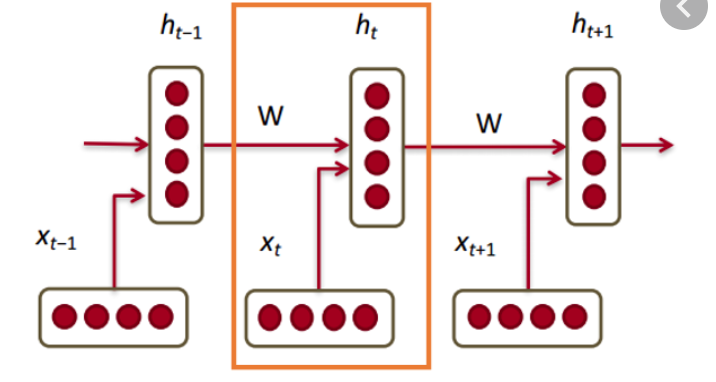

In [ ]:
Image('r5.png',width=500)


전체 시퀀스의 데이터에 대한 RNN 순전파를 실행해보자.  
가정:  
- 입력값 시퀀스는 T 개의 벡터와 D 개의 차원으로 구성 
- 은닉층 사이즈 H
- N 개 시퀀스를 포함한 미니배치
  
순전파를 작동시킨 뒤, 우리는 모든 타임 스텝의 은닉 상태로 되돌아온다.  

Inputs:
- x: Input data for the entire timeseries, of shape (N, T, D) 
- h0: Initial hidden state, of shape (N, H)
- Wx: Weight matrix for input-to-hidden connections, of shape (D, H)
- Wh: Weight matrix for hidden-to-hidden connections, of shape (H, H)
- b: Biases of shape (H,)

Returns a tuple of:
- h: Hidden states for the entire timeseries, of shape (N, T, H).
- cache: Values needed in the backward pass

In [ ]:
# 반복문 일러두기
# 특정 행 또는 열만 loop하기 // [:,i]

test = np.arange(12).reshape(3,4)
print('original: \n', test)


# (1) 행을 수정

for i in range(len(test[1])):

    test[1,i] *= 0 # 2 행을 모두 0으로

print('\n1 row modified: \n \n',test)

# (2) 열을 수정

for i in range(len(test[0])-1):

    test[i,3] *= 10000

print('\n 4 col modified: \n\n', test) # 4 열의 모든 원소에 10000 곱해

original: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

1 row modified: 
 
 [[ 0  1  2  3]
 [ 0  0  0  0]
 [ 8  9 10 11]]

 4 col modified: 

 [[     0      1      2  30000]
 [     0      0      0      0]
 [     8      9     10 110000]]


In [62]:
def rnn_forward(x, h0, Wx, Wh, b):
   
    h, cache = None, None
    
    h = np.random.randn(x.shape[0], x.shape[1], h0.shape[1]) 

    # rnn_step_forward를 사용.
    # 전체 rnn forward에 대한 것이니까, 모든 time-step을 고려해야 한다.
    # 그러면, 각 time-step에 따라 산출되는 출력값이 다를 것이고, cache도 다를 것이다.  -> loop 사용 동기

    cache = []
    prev_h = h0
    time_steps_n = x.shape[1]
    
    for time_step in range(time_steps_n):

        h[:,time_step,:], one_pass_cache = rnn_step_forward(x[:,time_step,:],prev_h,Wx,Wh,b) # time-step 변화에 따라 달라지는 각각의 입력값이 각각의 다른 은닉 상태를 출력
        prev_h = h[:,time_step,:] # 이전 은닉층은 timestep이 바뀜에 따라 T-1 번 갱신된다
        cache.append(one_pass_cache) # 매 timestep 마다 업데이트 되는 캐시를 모두 리스트 형태로 저장

        #참고: https://github.com/srinadhu/CS231n/blob/master/assignment3/cs231n/rnn_layers.py

    return h, cache

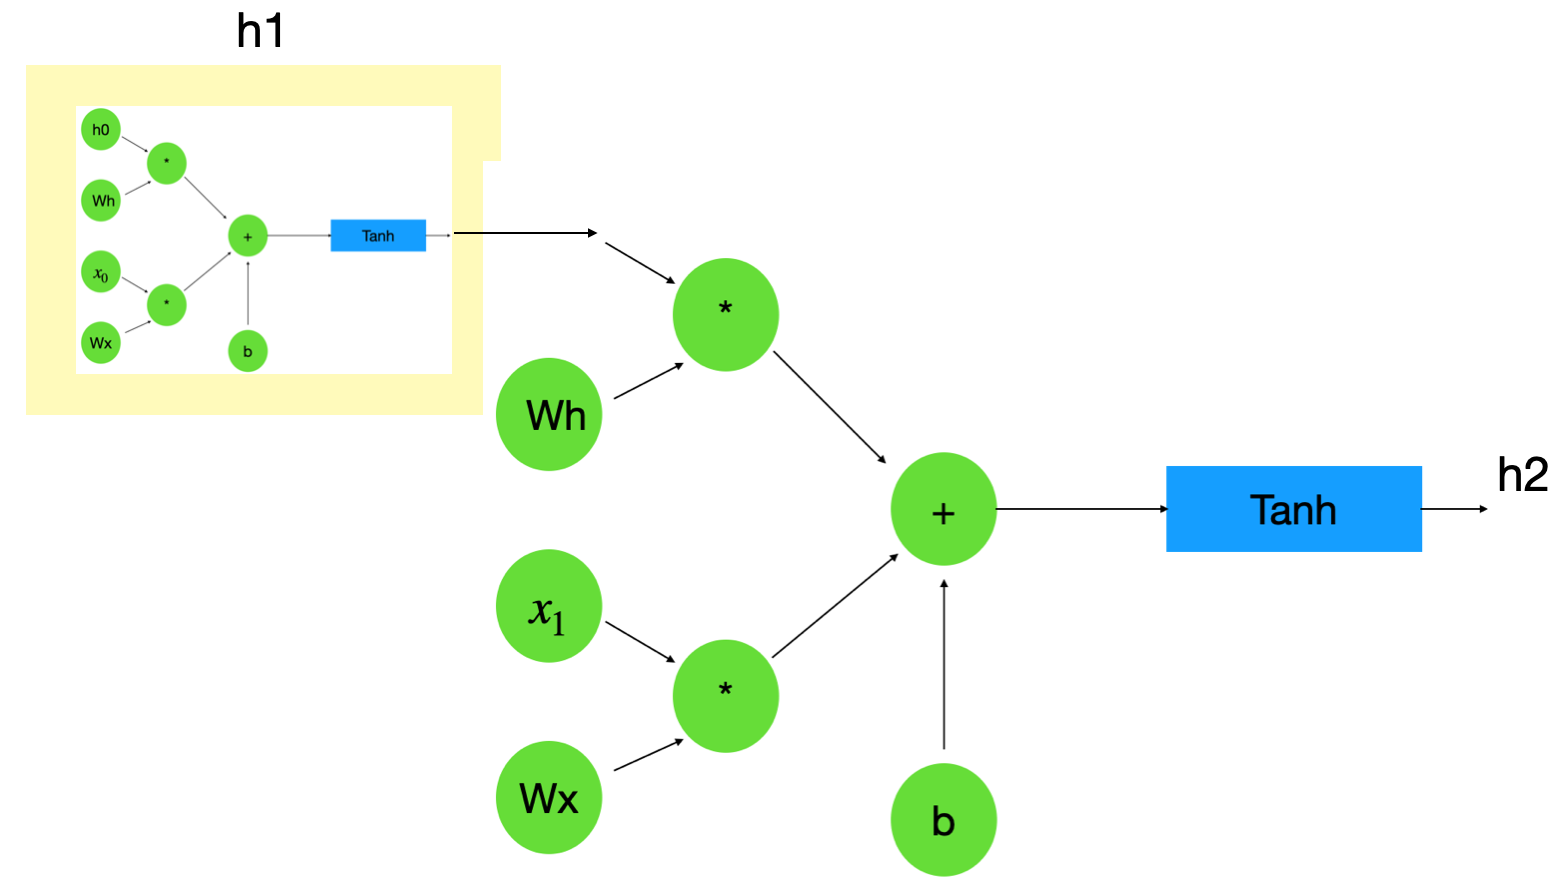

In [ ]:
Image('r13.png',width=800)

In [ ]:
N, T, D, H = 2, 3, 4, 5

x = np.linspace(-0.1, 0.3, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.3, 0.1, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.4, num=D*H).reshape(D, H)
Wh = np.linspace(-0.4, 0.1, num=H*H).reshape(H, H)
b = np.linspace(-0.7, 0.1, num=H)

h, _ = rnn_forward(x, h0, Wx, Wh, b)
expected_h = np.asarray([
  [
    [-0.42070749, -0.27279261, -0.11074945,  0.05740409,  0.22236251],
    [-0.39525808, -0.22554661, -0.0409454,   0.14649412,  0.32397316],
    [-0.42305111, -0.24223728, -0.04287027,  0.15997045,  0.35014525],
  ],
  [
    [-0.55857474, -0.39065825, -0.19198182,  0.02378408,  0.23735671],
    [-0.27150199, -0.07088804,  0.13562939,  0.33099728,  0.50158768],
    [-0.51014825, -0.30524429, -0.06755202,  0.17806392,  0.40333043]]])
print('h error: ', rel_error(expected_h, h)) # 0.7 or less

h error:  7.728466158305164e-08


### 3.2.2 역전파 바닐라 RNN

In [63]:
def rnn_backward(dh, cache):

    dx, dh0, dWx, dWh, db = None, None, None, None, None
    ##############################################################################
    N, T, H = dh.shape

    #D 를 얻는 것은 다소 까다로움?

    ##############################################################################
    return dx, dh0, dWx, dWh, db

#### 3.2.2.1 D 차원 구하기는 사실 쉽다

In [ ]:

_, cache = rnn_forward(x, h0, Wx, Wh, b)


print('Cache has these: For all the time-steps, (x, Wx, prev_h, Wh, next_h)\n\n')
print('- x shape: \n\n',x.shape, ' = (N,T,D)','\n\n')
print('Remind that cache = (x, Wx, prev_h, Wh, next_h)\n\n')
print('- First of all, we can see the length of cache for T = 3\n\n',len(cache),'\n\n')
print('- Pick a Matrix x at only one time-step: \n\n', cache[0],'\n\n - 5 개의 변수가 캐시 내에 저장되어 있다: \n\n', len(cache[0])) 
print('\n\n', '- Shape of the Wx:\n\n',cache[0][1].shape , ' //Remind that the shape of the Wx is (4, 5)') 

print('\n\n - Use cache[0][1].shape[0] to unpack the tuple above to get D as a integer. So we can find it: \n\n',cache[0][1].shape[0])


Cache has these: For all the time-steps, (x, Wx, prev_h, Wh, next_h)


- x shape: 

 (2, 3, 4)  = (N,T,D) 


Remind that cache = (x, Wx, prev_h, Wh, next_h)


- First of all, we can see the length of cache for T = 3

 3 


- Pick a Matrix x at only one time-step: 

 (array([[-0.1       , -0.0826087 , -0.06521739, -0.04782609],
       [ 0.10869565,  0.12608696,  0.14347826,  0.16086957]]), array([[-0.2       , -0.16842105, -0.13684211, -0.10526316, -0.07368421],
       [-0.04210526, -0.01052632,  0.02105263,  0.05263158,  0.08421053],
       [ 0.11578947,  0.14736842,  0.17894737,  0.21052632,  0.24210526],
       [ 0.27368421,  0.30526316,  0.33684211,  0.36842105,  0.4       ]]), array([[-0.3       , -0.25555556, -0.21111111, -0.16666667, -0.12222222],
       [-0.07777778, -0.03333333,  0.01111111,  0.05555556,  0.1       ]]), array([[-0.4       , -0.37916667, -0.35833333, -0.3375    , -0.31666667],
       [-0.29583333, -0.275     , -0.25416667, -0.23333333, -0.2125    ],
       [-0.1

#### 3.2.2.2 어떻게 Backprop을 수행하는가?  
  
위 Entire vanila RNN Forward 과정을 표현한 그림에서 암시하듯이, 우리는 Backprop을 $h_{The\ number\ of\ time\ steps}$에서 $h_0$ 방향으로 수행해야 한다. 따라서 이번 절에서는 (loop를 사용하는 경우에) 역방향 loop의 사용이 요구된다.

#####**cf** 역순 출력의 2 가지 방법들  
(1) reversed

In [ ]:
# Reversed 사용 예

test = [1,2,3,4,5,6,7]

for i in reversed(range(7)):

    print(test[i])

7
6
5
4
3
2
1


(2) Using -1 in for loop 

In [ ]:
test_m = np.arange(20).reshape(4,5)
print('reversed: \n\n')
for t in range(test_m.shape[0]-1,-1,-1): # 해당 행렬의 모든 행을 역순으로 출력하는 또 다른 방법
# 3 은 4-1. 3으로 해야 모든 행이 출력된다. 2일 시에는 맨 처음 행이 출력 x

    print(test_m[t])

print('\n\noriginal: \n\n',test_m)

reversed: 


[15 16 17 18 19]
[10 11 12 13 14]
[5 6 7 8 9]
[0 1 2 3 4]


original: 

 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


본격적으로 Entire RNN Backprop을 수행해보자.  


Inputs:
- dh: Upstream gradients of all hidden states, of shape (N, T, H). 
    
- NOTE: 'dh' contains the upstream gradients produced by the 
    individual loss functions at each timestep, *not* the gradients
    being passed between timesteps (which you'll have to compute yourself
    by calling rnn_step_backward in a loop).

    Returns a tuple of:
- dx: Gradient of inputs, of shape (N, T, D)
- dh0: Gradient of initial hidden state, of shape (N, H)
- dWx: Gradient of input-to-hidden weights, of shape (D, H)
- dWh: Gradient of hidden-to-hidden weights, of shape (H, H)
- db: Gradient of biases, of shape (H,)

In [64]:
def rnn_backward(dh, cache):

    dx, dh0, dWx, dWh, db = None, None, None, None, None
    ##############################################################################
    
    N, T, H = dh.shape
    D = cache[0][1].shape[0] # 위 설명 참고
   
    dx = np.zeros((N,T,D))
    dWx = np.zeros((D,H))
    dWh = np.zeros((H,H))
    db = np.zeros((H, ))
    dprev_h = np.zeros((N, H))

    for time_step in reversed(range(T)):
        # e.g. updWh = updated dWh
        dx[:,time_step,:], dprev_h, updWx, updWh, updb = rnn_step_backward(dh[:,time_step,:]+dprev_h, cache[time_step]) # dh = dnext_h
        

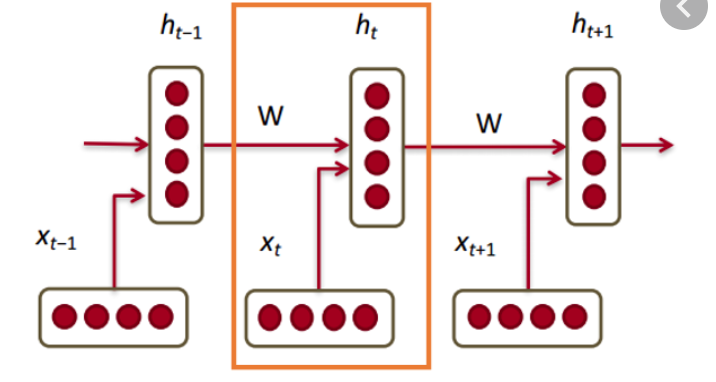

In [ ]:
Image('r5.png',width=500)

Entire RNN 역전파 과정에서 우리는 어느 것이 time-step이 바뀔 때마다 갱신되는지에 대해 주목할 필요가 있다. 위 그림은 우리가 이것을 인지하게 해주는 데 도움을 준다.  
  

&nbsp;&nbsp;&nbsp;(1) 위 그림을 참고할 때, 우리는 각 time-step 마다 새롭게 입력되는 것은 --- 각 Input $X_{t_{0,...n}}$과, 새롭게 입력되고 출력되는 Input & Output $h_{t_{0,...,n+1}}$  --- 이라는 점을 알 수 있다.  
&nbsp;&nbsp;&nbsp;(2) 또한, 우리는 매 time-step 마다 미분되는 것을 통해 ${dh_n}$**도** 갱신된다는 점을 인지할 수 있다.    
  
  이 3 가지와 위에서 살펴보았던 reverse loop에 주목할 때, 우리는 아래와 같이 코드를 작성할 수 있다:

In [65]:
def rnn_backward(dh, cache):

    dx, dh0, dWx, dWh, db = None, None, None, None, None
    ##############################################################################
    
    N, T, H = dh.shape
    D = cache[0][1].shape[0] # 위 설명 3.2.2.1 참고
   
    dx = np.zeros((N,T,D))
    dWx = np.zeros((D,H))
    dWh = np.zeros((H,H))
    db = np.zeros((H, ))
    dprev_h = np.zeros((N, H))

    for time_step in reversed(range(T)): # 역방향 loop는 3.2.2.2 참고
        # e.g. updWh = updated dWh
        dx[:,time_step,:], dprev_h, updWx, updWh, updb = rnn_step_backward(dh[:,time_step,:]+dprev_h, cache[time_step]) # dh = dnext_h
        
        #update
        
        dWx += updWx
        dWh += updWh
        db += updb

    dh0 = dprev_h # 맨 처음 h
    
    # cf. https://www.jianshu.com/p/cb99044bcb35
    ##############################################################################
    return dx, dh0, dWx, dWh, db

#### 역전파 과정 확인하기  
  
아래 코드는 위의 역전파 과정에서 Time-step이 갱신됨에 따라 각각의 변수들이 어떻게 변하는지에 대해 보여준다. 이것을 통해 우리는 (만약 원한다면) Entire RNN bacprop이 적절히 작동하고 있는지 확인할 수 있다.

In [ ]:

np.random.seed(231)

N, D, T, H = 2, 3, 10, 5

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)
dh= np.random.randn(N,T,H)
out, cache = rnn_forward(x, h0, Wx, Wh, b)
out = dh

dx, dh0, dWx, dWh, db = None, None, None, None, None
##############################################################################
    
N, T, H = dh.shape
D = cache[0][1].shape[0] # 위 설명 참고
   
dx = np.zeros((N,T,D))
dWx = np.zeros((D,H))
dWh = np.zeros((H,H))
db = np.zeros((H, ))
dprev_h = np.zeros((N, H))

for time_step in reversed(range(T)):
    # e.g. updWh = updated dWh
    dx[:,time_step,:], dprev_h, updWx, updWh, updb = rnn_step_backward(dh[:,time_step,:]+dprev_h, cache[time_step]) # dh = dnext_h
    
    #update
        
    dWx += updWx
    dWh += updWh
    db += updb

    #print(time_step,'th: ','dWx: \n\n', dWx,'\n\n')
    #print(time_step,'th: ','dWh: ', dWh,'\n\n')
    #print(time_step,'th: ','db: ', db,'\n\n')
    #print(time_step,'th: ','dx: ', dx,'\n\n')
    print(time_step,'th: ','dprev_h:\n\n ', dprev_h,'\n\n')
    if time_step == 0:

        print('Finish!')


dh0 = dprev_h
print('\n\n Initial prev_h is this: \n\n dh0: \n\n ', dh0,'\n\n')


9 th:  dprev_h:

  [[ 1.06399753  0.66373649  0.60429733 -0.47273123  0.08488759]
 [ 0.76982968  1.42245842 -0.78146114  0.97391792  0.12575529]] 


8 th:  dprev_h:

  [[ 0.86681457  0.72273585  2.29468214 -1.78629945  0.43084753]
 [ 0.22760796  0.06880307  0.52715151 -1.20237342  0.15892814]] 


7 th:  dprev_h:

  [[ 1.78236438 -5.54345079  2.72630408 -3.00686495 -1.86730346]
 [ 0.73553274 -0.98131113 -0.3259196   0.33581199 -0.64625979]] 


6 th:  dprev_h:

  [[-0.97012923 -1.82320523 -1.66867776 -0.54803776 -0.45682229]
 [-0.48814565 -0.03608279 -1.00817662  2.27480047 -0.25274953]] 


5 th:  dprev_h:

  [[ 2.0204212   4.95870469  0.85809038  2.01698496  1.08099012]
 [-0.13252032  0.02006302 -0.04597466  0.00830785  0.03773713]] 


4 th:  dprev_h:

  [[ 0.59430209 -3.14540834 -2.30857064 -7.05298898 -0.57818259]
 [ 0.22665105 -0.15255811  0.32797811 -1.38413301  0.08737015]] 


3 th:  dprev_h:

  [[ 2.60045254  8.07397458  0.23105919  5.0070286   1.65012431]
 [-0.62923133 -1.3970164

In [ ]:
np.random.seed(231)

N, D, T, H = 2, 3, 10, 5

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

out, cache = rnn_forward(x, h0, Wx, Wh, b)

dout = np.random.randn(*out.shape)

dx, dh0, dWx, dWh, db = rnn_backward(dout, cache)

fx = lambda x: rnn_forward(x, h0, Wx, Wh, b)[0]
fh0 = lambda h0: rnn_forward(x, h0, Wx, Wh, b)[0]
fWx = lambda Wx: rnn_forward(x, h0, Wx, Wh, b)[0]
fWh = lambda Wh: rnn_forward(x, h0, Wx, Wh, b)[0]
fb = lambda b: rnn_forward(x, h0, Wx, Wh, b)[0]

dx_num = eval_numerical_gradient_array(fx, x, dout)
dh0_num = eval_numerical_gradient_array(fh0, h0, dout)
dWx_num = eval_numerical_gradient_array(fWx, Wx, dout)
dWh_num = eval_numerical_gradient_array(fWh, Wh, dout)
db_num = eval_numerical_gradient_array(fb, b, dout)

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db)) # e-6 or less

dx error:  7.043580472229033e-09
dh0 error:  1.280219931050124e-08
dWx error:  1.035224202640389e-08
dWh error:  1.6104010124994535e-07
db error:  3.525344159349434e-09


### 3.3 워드 임베딩  


#### 3.3.1 Preliminary of the section 3.3  
  
  ##### Q. 인덱스 행렬은 다른 행렬 안에서 어떻게 작동하는가?  
    
e.g. $$x=\begin{bmatrix}
0 & 1\\
2 & 3
\end{bmatrix}\ \ \ ,where\  \ x\ \  is\ \  the\ \ index\ \ matrix
$$  
$$ W = \begin{bmatrix}
0&0&0\\
1&1&1\\
2&2&2\\
3&3&3
\end{bmatrix}\ \ \ ,\ where\ \ W\ \ is\ \ the\ \ weight\ \ matrix
$$

In [ ]:
x = np.arange(4).reshape(2,2)
print('x= \n\n',x)

Wx = np.array([[0,0,0],[1,1,1],[2,2,2],[3,3,3]])
print('\n\nW: \n\n',Wx,'\n\n')
print('\n\nW[x] = \n\n',Wx[x])

x2 = x[0]
print('\n\n x의 1 행만을 인덱스로 사용한다면, 다음과 같다: \n\n', Wx[x2])

x= 

 [[0 1]
 [2 3]]


W: 

 [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]] 




W[x] = 

 [[[0 0 0]
  [1 1 1]]

 [[2 2 2]
  [3 3 3]]]


 x의 1 행만을 인덱스로 사용한다면, 다음과 같다: 

 [[0 0 0]
 [1 1 1]]


인덱스 array idx를 (m, n) shape으로 출력하든, (n, m) 으로 출력하든, idx 행렬을 입력값으로 갖는 가중치 행렬 W[idx]의 출력값은 동일하다.

In [ ]:
W = np.arange(36).reshape(12,3)
print('W는 다음과 같다: \n\n', W, W.shape,'\n\n')

#case1

a = np.array([0,1]).reshape(1,2)
print('\ncase1: Use a Matrix(1,2) containing [0,1] as a index-Matrix \n\n',a,'\n\n')

W = np.arange(36).reshape(12,3)

print('\nResult to case1. \n\n', W[a],'\n\n')
#########

#case2

b = np.array([0,1]).reshape(2,1)
print('\ncase2: Use Matrix(2,1) with [1,0] as a index M \n\n',b,'\n\n')

W = np.arange(36).reshape(12,3)

print('\nResult to case2. \n\n', W[b],'\n\n')
print('==> Moral: [0 1] 형태를 인덱스로 입력하든, [[0][1]] 형태를 인덱스로 입력하든 W에서 출력되는 것은 0th 행과 1th 행으로 동일하다.\n')


W는 다음과 같다: 

 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]
 [30 31 32]
 [33 34 35]] (12, 3) 



case1: Use a Matrix(1,2) containing [0,1] as a index-Matrix 

 [[0 1]] 



Result to case1. 

 [[[0 1 2]
  [3 4 5]]] 



case2: Use Matrix(2,1) with [1,0] as a index M 

 [[0]
 [1]] 



Result to case2. 

 [[[0 1 2]]

 [[3 4 5]]] 


==> Moral: [0 1] 형태를 인덱스로 입력하든, [[0][1]] 형태를 인덱스로 입력하든 W에서 출력되는 것은 0th 행과 1th 행으로 동일하다.



#### 3.3.1 Forward pass


워드 임베딩의 순전파. 우리는 각 시퀀스가 T 길이를 가진 N 사이즈의 미니배치를 가지고 수행한다. 우리는 각 word를 D 차원의 벡터에 할당할 때 V 개의 word를 가진 voca를 가정한다.

**Inputs:**
- x: Integer array of shape (N, T) giving indices of words. Each element idx of x must be in the range 0 <= idx < V.
- W: Weight matrix of shape (V, D) giving word vectors for all words.

**Returns a tuple of:**
- out: Array of shape (N, T, D) giving word vectors for all input words.
- cache: Values needed for the backward pass


In [109]:
def word_embedding_forward(x, W):

    out, cache = None, None

    out = W[x] 
    cache = (x, W)

    return out, cache

[autoreload of cs231n.classifiers.rnn failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/content/drive/My Drive/Colab Notebooks/cs231n/assignments/assignment3/cs231n/classifiers/rnn.py", line 86
    """
      ^
IndentationError: unindent does not match any outer indentation level
]


In [ ]:
N, T, V, D = 2, 4, 5, 3

x = np.asarray([[0, 3, 1, 2], [2, 1, 0, 3]]) 
W = np.linspace(0, 1, num=V*D).reshape(V, D)

out, _ = word_embedding_forward(x, W)

expected_out = np.asarray([
 [[ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.42857143,  0.5,         0.57142857]],
 [[ 0.42857143,  0.5,         0.57142857],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429]]])

print('out error: ', rel_error(expected_out, out)) # e-8 or less

out error:  1.0000000094736443e-08


#### 3.3.2 Backward Pass


워드 임베딩의 역전파. 우리는 워드가 정수이기 때문에 그것으로 역전파를 수행할 수 없다. 따라서 우리는 오직 워드 임베딩 행렬의 그래디언트를 반환만 한다.

- **HINT:** Look up the function np.add.at

**Inputs:**
- dout: Upstream gradients of shape (N, T, D)
- cache: Values from the forward pass

**Returns:**
- dW: Gradient of word embedding matrix, of shape (V, D).


#### 3.3.2.1 np.add 공부 



In [ ]:
s1 = 2
s2 = 3

add_sclars = np.add(s1,s2)
print('add_scalrs: ',add_sclars)

M1 = np.arange(6).reshape(2,3)
M2 = np.arange(6).reshape(2,3)
print('\n\nM1:\n',M1,'\n\nM2: \n',M2)
add_M = np.add(M1,M2)
print('\n\nadd_Matrix:\n ',add_M)

add_scalrs:  5


M1:
 [[0 1 2]
 [3 4 5]] 

M2: 
 [[0 1 2]
 [3 4 5]]


add_Matrix:
  [[ 0  2  4]
 [ 6  8 10]]


#### 3.3.2.2 np.add.at 공부 (아래 코드에 대한 hint에 해당하는 메서드)

np.add.at는 가령 A array의 idx 위치에 B array의 원소를 순서대로 더해주는 메서드이다. 이 작업은 enumerate 문을 통해 수행될 수도 있다. 후자의 것을 사용하면 이 작업의 과정을 직관적으로 이해하기 쉽다는 장점이 있는 것 같다. 하지만 많은 수의 반복문이 요구되는 경우에 이것은 연산적으로 매우 비효율적이다. 따라서 vectorization 연산을 수행하는 전자의 방법(np.add.at)이 더 선호되어야 할 것이다. 이번 절에서 나는 이 메서드에 대한 이해를 돕기 위해 두 가지 방법 모두를 알아본다.  
  
  **(1)  enumerate 문을 사용하는 전략**  
    
  
enumerate()는 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체들을 loop 하면서 출력해주는 역할을 수행한다:  

In [ ]:
array1 = np.array(['APPL','MSFT','TQQQ','DAL'])

for i, value in enumerate(array1, start=1):
    print(i,value)

1 APPL
2 MSFT
3 TQQQ
4 DAL


np.add.at 메서드를 직접 사용하기 이전에, 이 enumerate()를 이용하여 위 메서드가 어떻게 작동하는지에 대해 명료한 이해를 얻어보자. 앞에서 말했듯이, 우리는 지금 가령 A array의 idx 위치에 B array의 원소들을 더해주기 위해 이 메서드를 공부하고 있다.

In [ ]:
A = np.arange(12).reshape(4,3)
B = np.arange(6).reshape(2,3)
print('A array: \n',A,'\n\n B array: \n',B)

idx = np.array([1,2]) # A의 index 위치를 담고 있는 array

for i,index in enumerate(idx):

    A[index] += B[i]
    
    print('\n',i+1,'번째 loop: ','\n\n',A,'\n')

A array: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

 B array: 
 [[0 1 2]
 [3 4 5]]

 1 번째 loop:  

 [[ 0  1  2]
 [ 3  5  7]
 [ 6  7  8]
 [ 9 10 11]] 


 2 번째 loop:  

 [[ 0  1  2]
 [ 3  5  7]
 [ 9 11 13]
 [ 9 10 11]] 



**(2) np.add.at을 사용하는 전략**   

  
   
np.add.at 메서드는 위 작업을 vectorization 연산을 통해 수행하므로 더 연산적으로 효율적이다. 우리는 위와 동일한 작업을 이것을 가지고 다음과 같이 수행할 수 있다:

In [ ]:
A = np.arange(12).reshape(4,3)
B = np.arange(6).reshape(2,3)
print('A array: \n',A,'\n\n B array: \n',B)

idx = np.array([1,2]) # A의 index 위치를 담고 있는 array

np.add.at(A,idx,B)
print('\nresult: \n\n',A)

A array: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

 B array: 
 [[0 1 2]
 [3 4 5]]

result: 

 [[ 0  1  2]
 [ 3  5  7]
 [ 9 11 13]
 [ 9 10 11]]


In [110]:
def word_embedding_backward(dout, cache):

    dW = None

    # HINT: Look up the function np.add.at                                       

    x, W = cache
    
    # 차원 수 설정

    N, T, D = dout.shape
    V = W[0].shape # W (V, D)
    
    # 초기화 dW
    dW = np.zeros(W.shape)
    

    # 힌트 사용하여 역전파 하기
    # cf. https://rfriend.tistory.com/tag/np.add.at%28%29
    
    np.add.at(dW,x,dout) # W[x] = out 의 역전파 코드



    return dW

In [ ]:
np.random.seed(231)

N, T, V, D = 50, 3, 5, 6
x = np.random.randint(V, size=(N, T))
W = np.random.randn(V, D)

out, cache = word_embedding_forward(x, W)
dout = np.random.randn(*out.shape)
dW = word_embedding_backward(dout, cache)

f = lambda W: word_embedding_forward(x, W)[0]
dW_num = eval_numerical_gradient_array(f, W, dout)

print('dW error: ', rel_error(dW, dW_num)) # e-11 or less

dW error:  3.2774595693100364e-12


### 3.4 Temporal Affine Layer





매 timestep 마다 우리는 <RNN 은닉 벡터>를 <각 timestep에 상응하는 어휘vocabulary를 구성하는 각 글자word에 대한 스코어>로 변환하는 affine 함수를 사용한다.

#### 3.4.1 Forward pass

In [111]:
def temporal_affine_forward(x, w, b):
    """
    Forward pass for a temporal affine layer. The input is a set of D-dimensional
    vectors arranged into a minibatch of N timeseries, each of length T. We use
    an affine function to transform each of those vectors into a new vector of
    dimension M.

    Inputs:
    - x: Input data of shape (N, T, D)
    - w: Weights of shape (D, M)
    - b: Biases of shape (M,)

    Returns a tuple of:
    - out: Output data of shape (N, T, M)
    - cache: Values needed for the backward pass
    """
    N, T, D = x.shape
    M = b.shape[0]
    out = x.reshape(N * T, D).dot(w).reshape(N, T, M) + b
    cache = x, w, b, out
    return out, cache


#### 3.4.2 Backward pass

In [112]:
def temporal_affine_backward(dout, cache):
    """
    Backward pass for temporal affine layer.

    Input:
    - dout: Upstream gradients of shape (N, T, M)
    - cache: Values from forward pass

    Returns a tuple of:
    - dx: Gradient of input, of shape (N, T, D)
    - dw: Gradient of weights, of shape (D, M)
    - db: Gradient of biases, of shape (M,)
    """
    x, w, b, out = cache
    N, T, D = x.shape
    M = b.shape[0]

    dx = dout.reshape(N * T, M).dot(w.T).reshape(N, T, D)
    dw = dout.reshape(N * T, M).T.dot(x.reshape(N * T, D)).T
    db = dout.sum(axis=(0, 1))

    return dx, dw, db

In [ ]:
np.random.seed(231)

# Gradient check for temporal affine layer
N, T, D, M = 2, 3, 4, 5
x = np.random.randn(N, T, D)
w = np.random.randn(D, M)
b = np.random.randn(M)

out, cache = temporal_affine_forward(x, w, b)

dout = np.random.randn(*out.shape)

fx = lambda x: temporal_affine_forward(x, w, b)[0]
fw = lambda w: temporal_affine_forward(x, w, b)[0]
fb = lambda b: temporal_affine_forward(x, w, b)[0]

dx_num = eval_numerical_gradient_array(fx, x, dout)
dw_num = eval_numerical_gradient_array(fw, w, dout)
db_num = eval_numerical_gradient_array(fb, b, dout)

dx, dw, db = temporal_affine_backward(dout, cache)

print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db)) #e-9 or less

dx error:  2.9215945034030545e-10
dw error:  1.5772088618663602e-10
db error:  3.252200556967514e-11


### 3.5 Temporal Softmax loss  

In an RNN language model, at every timestep we produce a score for each word in the vocabulary. We know the ground-truth word at each timestep, so we use a softmax loss function to compute loss and gradient at each timestep. We sum the losses over time and average them over the minibatch.

However there is one wrinkle: since we operate over minibatches and different captions may have different lengths, we append `<NULL>` tokens to the end of each caption so they all have the same length. We don't want these `<NULL>` tokens to count toward the loss or gradient, so in addition to scores and ground-truth labels our loss function also accepts a `mask` array that tells it which elements of the scores count towards the loss.

Since this is very similar to the softmax loss function you implemented in assignment 1, we have implemented this loss function for you; look at the `temporal_softmax_loss` function in the file `cs231n/rnn_layers.py`.

Run the following cell to sanity check the loss and perform numeric gradient checking on the function. You should see an error for dx on the order of e-7 or less.

In [113]:
# the temporal_softmax_loss function in the file cs231n/rnn_layers.py.

def temporal_softmax_loss(x, y, mask, verbose=False):
    """
    A temporal version of softmax loss for use in RNNs. We assume that we are
    making predictions over a vocabulary of size V for each timestep of a
    timeseries of length T, over a minibatch of size N. The input x gives scores
    for all vocabulary elements at all timesteps, and y gives the indices of the
    ground-truth element at each timestep. We use a cross-entropy loss at each
    timestep, summing the loss over all timesteps and averaging across the
    minibatch.

    As an additional complication, we may want to ignore the model output at some
    timesteps, since sequences of different length may have been combined into a
    minibatch and padded with NULL tokens. The optional mask argument tells us
    which elements should contribute to the loss.

    Inputs:
    - x: Input scores, of shape (N, T, V)
    - y: Ground-truth indices, of shape (N, T) where each element is in the range
         0 <= y[i, t] < V
    - mask: Boolean array of shape (N, T) where mask[i, t] tells whether or not
      the scores at x[i, t] should contribute to the loss.

    Returns a tuple of:
    - loss: Scalar giving loss
    - dx: Gradient of loss with respect to scores x.
    """

    N, T, V = x.shape

    x_flat = x.reshape(N * T, V)
    y_flat = y.reshape(N * T)
    mask_flat = mask.reshape(N * T)

    probs = np.exp(x_flat - np.max(x_flat, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    loss = -np.sum(mask_flat * np.log(probs[np.arange(N * T), y_flat])) / N
    dx_flat = probs.copy()
    dx_flat[np.arange(N * T), y_flat] -= 1
    dx_flat /= N
    dx_flat *= mask_flat[:, None]

    if verbose:
        print("dx_flat: ", dx_flat.shape)

    dx = dx_flat.reshape(N, T, V)

    return loss, dx

In [ ]:
# Sanity check for temporal softmax loss
from cs231n.rnn_layers import temporal_softmax_loss

N, T, V = 100, 1, 10

def check_loss(N, T, V, p):
    x = 0.001 * np.random.randn(N, T, V)
    y = np.random.randint(V, size=(N, T))
    mask = np.random.rand(N, T) <= p
    print(temporal_softmax_loss(x, y, mask)[0])
  
check_loss(100, 1, 10, 1.0)   # Should be about 2.3
check_loss(100, 10, 10, 1.0)  # Should be about 23
check_loss(5000, 10, 10, 0.1) # Should be within 2.2-2.4

# Gradient check for temporal softmax loss
N, T, V = 7, 8, 9

x = np.random.randn(N, T, V)
y = np.random.randint(V, size=(N, T))
mask = (np.random.rand(N, T) > 0.5)

loss, dx = temporal_softmax_loss(x, y, mask, verbose=False)

dx_num = eval_numerical_gradient(lambda x: temporal_softmax_loss(x, y, mask)[0], x, verbose=False)

print('dx error: ', rel_error(dx, dx_num)) # less than 0.7

2.3027781774290146
23.025985953127226
2.2643611790293394
dx error:  2.583585303524283e-08


### 3.6 RNN for image captioning  

Now that you have implemented the necessary layers, you can combine them to build an image captioning model. Open the file `cs231n/classifiers/rnn.py` and look at the `CaptioningRNN` class.

Implement the forward and backward pass of the model in the `loss` function. For now you only need to implement the case where `cell_type='rnn'` for vanialla RNNs; you will implement the LSTM case later. After doing so, run the following to check your forward pass using a small test case; you should see error on the order of `e-10` or less.

A CaptioningRNN produces captions from image features using a recurrent neural network. The RNN receives 
- input vectors of size D, 
- has a vocab size of V, 
- works on sequences of length T, 
- has an RNN hidden dimension of H, 
- uses word vectors of dimension W, 
- and operates on minibatches of size N.   
  
Note that we don't use any regularization for the CaptioningRNN.


**Inputs:**  

- **word_to_idx:** A dictionary giving the vocabulary. It contains V entries, and maps each string to a unique integer in the range [0, V).  


- **input_dim:** Dimension D of input image feature vectors.  


- **wordvec_dim:** Dimension W of word vectors.  


- **hidden_dim:** Dimension H for the hidden state of the RNN.  


- **cell_type:** What type of RNN to use; either 'rnn' or 'lstm'.  


- **dtype:** numpy datatype to use; use float32 for training and float64 for numeric gradient checking.  


### 3.6.1 초기화  
우리는 아래 코드에서 loss 함수를 작성한다. 여기서 사용되는 여러 매개변수들은 다음 같이 초기화된다:  


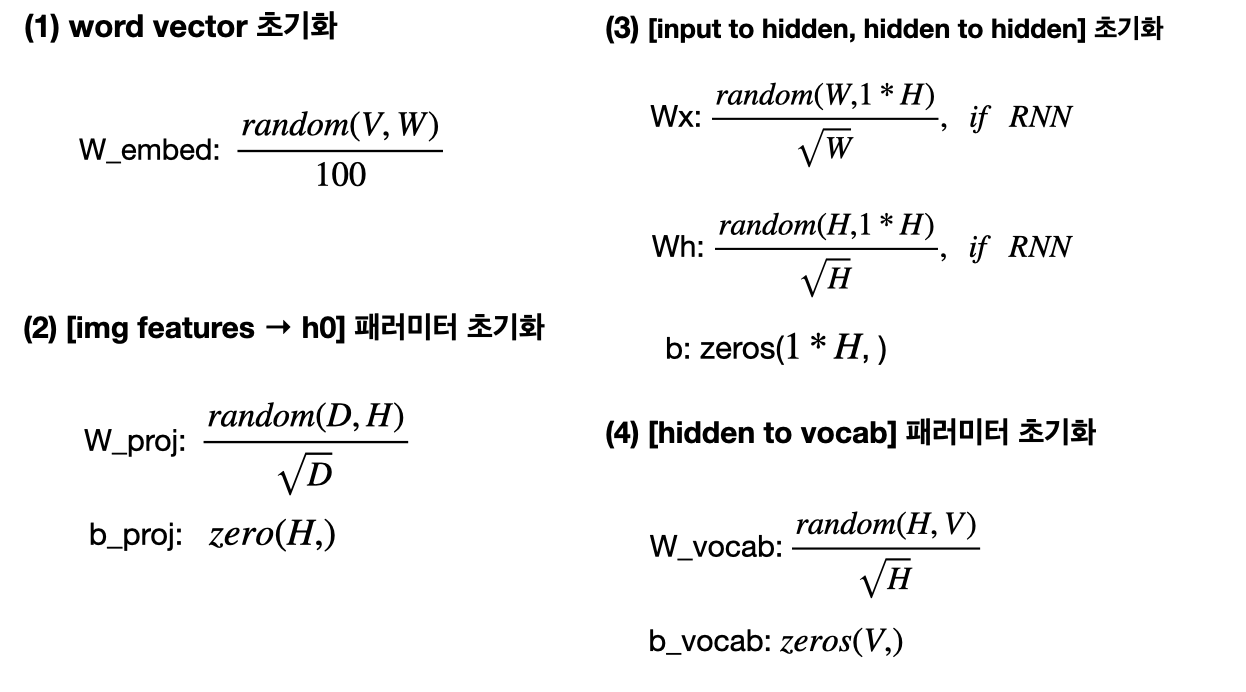

In [ ]:
Image('r16.png',width=800)

In [ ]:
   def __init__(
        self,
        word_to_idx,
        input_dim=512,
        wordvec_dim=128,
        hidden_dim=128,
        cell_type="rnn",
        dtype=np.float32,
    ):

        # Construct a new CaptioningRNN instance.
 
        if cell_type not in {"rnn", "lstm"}:
            raise ValueError('Invalid cell_type "%s"' % cell_type)

        self.cell_type = cell_type
        self.dtype = dtype
        self.word_to_idx = word_to_idx
        self.idx_to_word = {i: w for w, i in word_to_idx.items()}
        self.params = {}

        vocab_size = len(word_to_idx)

        self._null = word_to_idx["<NULL>"]
        self._start = word_to_idx.get("<START>", None)
        self._end = word_to_idx.get("<END>", None)

        # Initialize word vectors
        self.params["W_embed"] = np.random.randn(vocab_size, wordvec_dim)
        self.params["W_embed"] /= 100

        # Initialize CNN -> hidden state projection parameters
        self.params["W_proj"] = np.random.randn(input_dim, hidden_dim)
        self.params["W_proj"] /= np.sqrt(input_dim)
        self.params["b_proj"] = np.zeros(hidden_dim)

        # Initialize parameters for the RNN
        dim_mul = {"lstm": 4, "rnn": 1}[cell_type]
        self.params["Wx"] = np.random.randn(wordvec_dim, dim_mul * hidden_dim)
        self.params["Wx"] /= np.sqrt(wordvec_dim)
        self.params["Wh"] = np.random.randn(hidden_dim, dim_mul * hidden_dim)
        self.params["Wh"] /= np.sqrt(hidden_dim)
        self.params["b"] = np.zeros(dim_mul * hidden_dim)

        # Initialize output to vocab weights
        self.params["W_vocab"] = np.random.randn(hidden_dim, vocab_size)
        self.params["W_vocab"] /= np.sqrt(hidden_dim)
        self.params["b_vocab"] = np.zeros(vocab_size)

        # Cast parameters to correct dtype
        for k, v in self.params.items():
            self.params[k] = v.astype(self.dtype)

### 3.6.2 loss 구하기

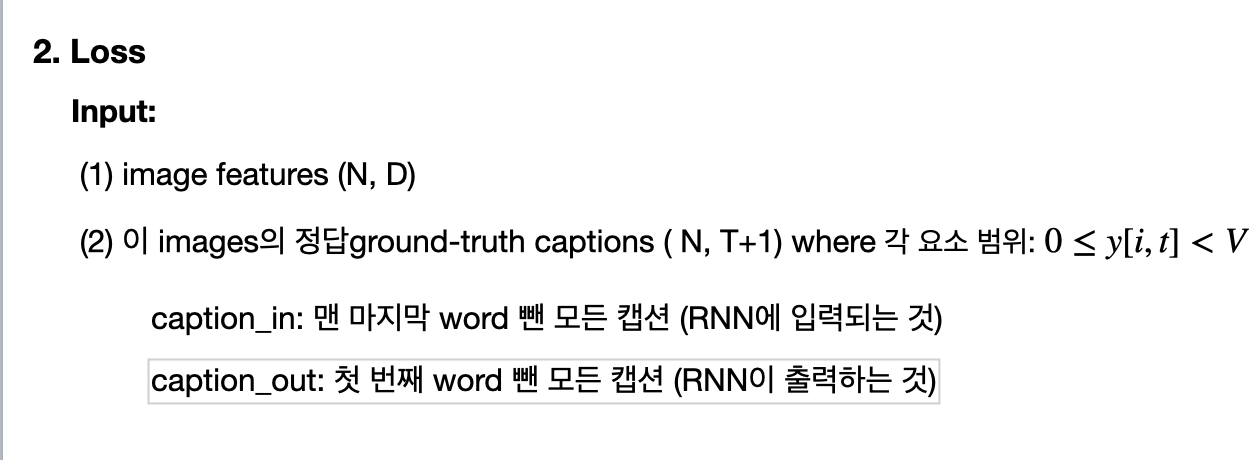

In [ ]:
Image('r17.png',width=800)

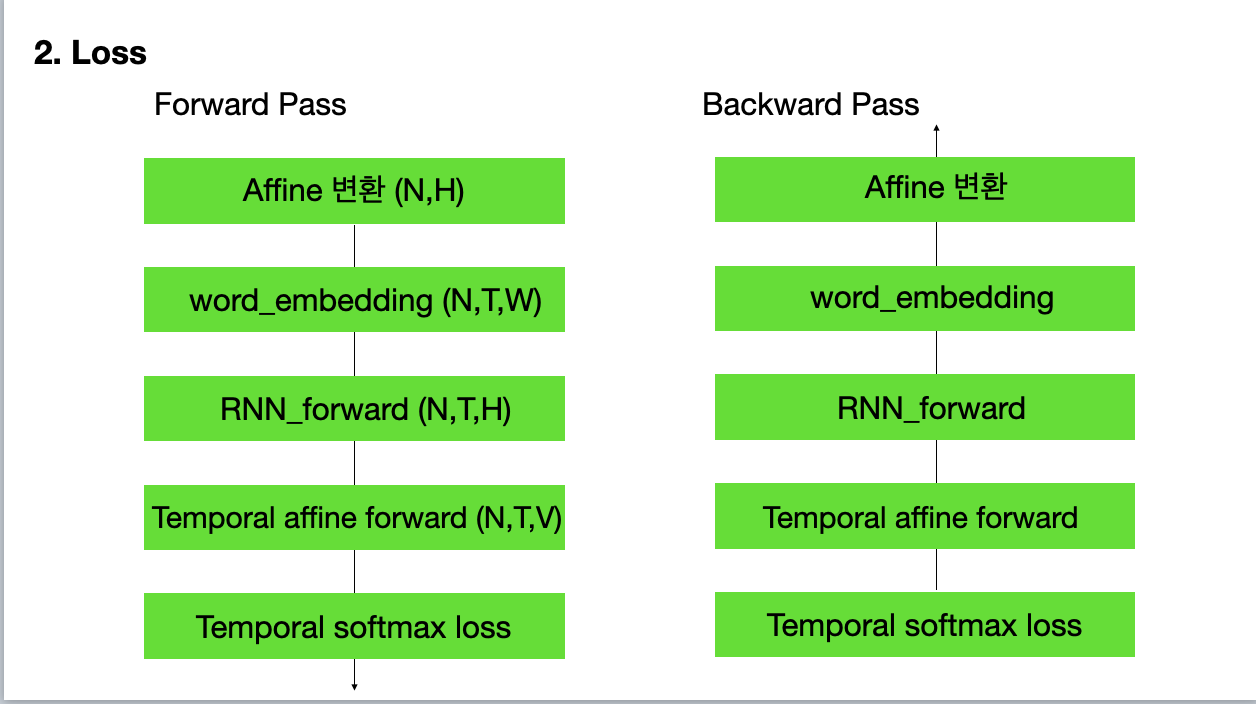

In [ ]:
Image('r18.png',width=1000)

In the backward pass, you will need to compute the gradient of the loss with respect to all model parameters. Use the loss and grads variables defined above to store loss and gradients; grads[k] should give the gradients for self.params[k].  
  
Note also that you are allowed to make use of functions from layers.py in your implementation, if needed. 

In [114]:
# remind affine f/b

def affine_forward(x, w, b):
  
    out = x.reshape(x.shape[0], -1).dot(w) + b
    cache = (x, w, b)
    return out, cache


def affine_backward(dout, cache):
  
    x, w, b = cache
    dx = dout.dot(w.T).reshape(x.shape)
    dw = x.reshape(x.shape[0], -1).T.dot(dout)
    db = np.sum(dout, axis=0)
    return dx, dw, db


### class(초기화 def + loss def)

In [120]:
# 초기화 + loss 

from builtins import range
from builtins import object
import numpy as np

#from ..rnn_layers import *


class CaptioningRNN(object):
    

    def __init__(
        self,
        word_to_idx,
        input_dim=512,
        wordvec_dim=128,
        hidden_dim=128,
        cell_type="rnn",
        dtype=np.float32,
    ):

        # Construct a new CaptioningRNN instance.
 
        if cell_type not in {"rnn", "lstm"}:
            raise ValueError('Invalid cell_type "%s"' % cell_type)

        self.cell_type = cell_type
        self.dtype = dtype
        self.word_to_idx = word_to_idx
        self.idx_to_word = {i: w for w, i in word_to_idx.items()}
        self.params = {}

        vocab_size = len(word_to_idx)

        self._null = word_to_idx["<NULL>"]
        self._start = word_to_idx.get("<START>", None)
        self._end = word_to_idx.get("<END>", None)

        # Initialize word vectors
        self.params["W_embed"] = np.random.randn(vocab_size, wordvec_dim)
        self.params["W_embed"] /= 100

        # Initialize CNN -> hidden state projection parameters
        self.params["W_proj"] = np.random.randn(input_dim, hidden_dim)
        self.params["W_proj"] /= np.sqrt(input_dim)
        self.params["b_proj"] = np.zeros(hidden_dim)

        # Initialize parameters for the RNN
        dim_mul = {"lstm": 4, "rnn": 1}[cell_type]
        self.params["Wx"] = np.random.randn(wordvec_dim, dim_mul * hidden_dim)
        self.params["Wx"] /= np.sqrt(wordvec_dim)
        self.params["Wh"] = np.random.randn(hidden_dim, dim_mul * hidden_dim)
        self.params["Wh"] /= np.sqrt(hidden_dim)
        self.params["b"] = np.zeros(dim_mul * hidden_dim)

        # Initialize output to vocab weights
        self.params["W_vocab"] = np.random.randn(hidden_dim, vocab_size)
        self.params["W_vocab"] /= np.sqrt(hidden_dim)
        self.params["b_vocab"] = np.zeros(vocab_size)

        # Cast parameters to correct dtype
        for k, v in self.params.items():
            self.params[k] = v.astype(self.dtype)

    def loss(self, features, captions):

        """
        Compute training-time loss for the RNN. We input image features and
        ground-truth captions for those images, and use an RNN (or LSTM) to compute
        loss and gradients on all parameters.

        Inputs:

        - features: Input image features, of shape (N, D)
        - captions: Ground-truth captions; an integer array of shape (N, T + 1) where
          each element is in the range 0 <= y[i, t] < V

        Returns a tuple of:

        - loss: Scalar loss
        - grads: Dictionary of gradients parallel to self.params

        """

        # Cut captions into two pieces: 
        
        # These are offset by one relative to each other because the RNN should produce word (t+1)
        # after receiving word t. The first element of captions_in will be the START
        # token, and the first element of captions_out will be the first word.

        captions_in = captions[:, :-1] # 맨 마지막에 하나 빼고 모두
        captions_out = captions[:, 1:] # 맨 첫 번째 하나 빼고 모두

        # You'll need this
        mask = captions_out != self._null # caption_out이 비지 않으면 masking 하기

        # Weight and bias for the affine transform from image features to initial hidden state
        W_proj, b_proj = self.params["W_proj"], self.params["b_proj"]

        # Word embedding matrix
        W_embed = self.params["W_embed"]

        # Input-to-hidden, hidden-to-hidden, and biases for the RNN
        Wx, Wh, b = self.params["Wx"], self.params["Wh"], self.params["b"]

        # Weight and bias for the hidden-to-vocab transformation.
        W_vocab, b_vocab = self.params["W_vocab"], self.params["b_vocab"]

        loss, grads = 0.0, {}
   

        ############################################################################

        #(A) Forward pass

        # (1) 어파인 포워드
        h0, cache_h = affine_forward(features, W_proj, b_proj) 

        # (2) 워드 임베딩
        wordvector, cache_w = word_embedding_forward(captions_in, W_embed) 
       
        # (3) rnn 포워드
        hs, cache_hs = rnn_forward(wordvector,h0, Wx, Wh, b) 

        # (4) 매 시간스텝 마다 voca에 대한 스코어 계산해주는 어파인 변환
        scores, cache_t = temporal_affine_forward(hs, W_vocab, b_vocab) 

        # (5) Temporal 소프트맥스 loss 
        loss, dout = temporal_softmax_loss(scores, captions_out, mask) 

        #(B) Backward pass

        # (5) -> (4)
        dout, grads["W_vocab"],grads["b_vocab"] = temporal_affine_backward(dout, cache_t) 
        
        # (4) -> (3)
        if self.cell_type == "rnn":
            dout, dh0, grads["Wx"],grads["Wh"],grads["b"]= rnn_backward(dout, cache_hs) 
        
        # (3) -> (2)
        grads["W_embed"] = word_embedding_backward(dout, cache_w)

        # (2) -> (1)
        _, grads["W_proj"], grads["b_proj"] = affine_backward(dh0, cache_h) # 이 함수의 output: dx, dw, db. 우리는 가중치 업데이트만을 필요로 하기 때문에, 여기서 dx에 해당하는 feature의 grad는 구하지 않는다.
                          
        ############################################################################
        return loss, grads

In [121]:
N, D, W, H = 10, 20, 30, 40
word_to_idx = {'<NULL>': 0, 'cat': 2, 'dog': 3}
V = len(word_to_idx)
T = 13
model = CaptioningRNN(word_to_idx,
          input_dim=D,
          wordvec_dim=W,
          hidden_dim=H,
          cell_type='rnn',
          dtype=np.float64)

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)

features = np.linspace(-1.5, 0.3, num=(N * D)).reshape(N, D)
captions = (np.arange(N * T) % V).reshape(N, T)

loss, grads = model.loss(features, captions)
expected_loss = 9.83235591003

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  9.832355910027387
expected loss:  9.83235591003
difference:  2.6130209107577684e-12


### 3.7 Overfit small data  

Similar to the `Solver` class that we used to train image classification models on the previous assignment, on this assignment we use a `CaptioningSolver` class to train image captioning models. Open the file `cs231n/captioning_solver.py` and read through the `CaptioningSolver` class; it should look very familiar.

Once you have familiarized yourself with the API, run the following to make sure your model overfits a small sample of 100 training examples. You should see a final loss of less than 0.1.

base dir  /content/drive/My Drive/Colab Notebooks/cs231n/assignments/assignment3/cs231n/datasets/coco_captioning
(Iteration 1 / 100) loss: 76.913486
(Iteration 11 / 100) loss: 24.669148
(Iteration 21 / 100) loss: 5.338758
(Iteration 31 / 100) loss: 0.834628
(Iteration 41 / 100) loss: 0.376077
(Iteration 51 / 100) loss: 0.214341
(Iteration 61 / 100) loss: 0.149266
(Iteration 71 / 100) loss: 0.130839
(Iteration 81 / 100) loss: 0.103898
(Iteration 91 / 100) loss: 0.100921


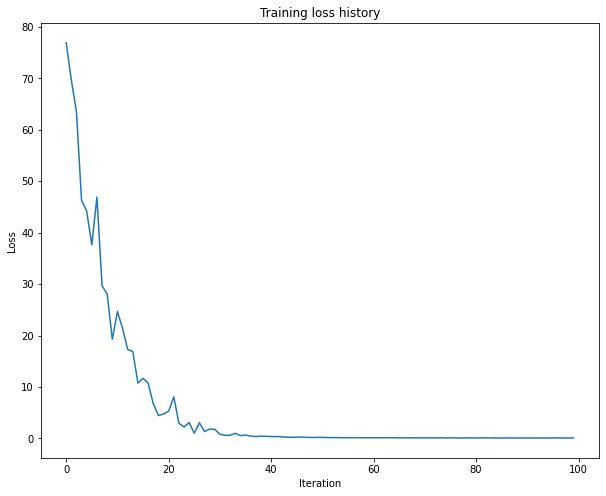

In [122]:
np.random.seed(231)

small_data = load_coco_data(max_train=50)

small_rnn_model = CaptioningRNN(
          cell_type='rnn',
          word_to_idx=data['word_to_idx'],
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
        )

small_rnn_solver = CaptioningSolver(small_rnn_model, small_data,
           update_rule='adam',
           num_epochs=50,
           batch_size=25,
           optim_config={
             'learning_rate': 5e-3,
           },
           lr_decay=0.95,
           verbose=True, print_every=10,
         )

small_rnn_solver.train()

# Plot the training losses
plt.plot(small_rnn_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show() # less than 0.1

In [123]:
print('Final loss: ', small_rnn_solver.loss_history[-1])

Final loss:  0.11039219573725259


### 3.8 Test-time sampling  

Unlike classification models, image captioning models behave very differently at training time and at test time. At training time, we have access to the ground-truth caption, so we feed ground-truth words as input to the RNN at each timestep. At test time, we sample from the distribution over the vocabulary at each timestep, and feed the sample as input to the RNN at the next timestep.

In the file `cs231n/classifiers/rnn.py`, implement the `sample` method for test-time sampling. After doing so, run the following to sample from your overfitted model on both training and validation data. The samples on training data should be very good; the samples on validation data probably won't make sense.

In [ ]:
# 최종 코드

from builtins import range
from builtins import object
import numpy as np

from ..layers import *
from ..rnn_layers import *


class CaptioningRNN(object):
    

    def __init__(
        self,
        word_to_idx,
        input_dim=512,
        wordvec_dim=128,
        hidden_dim=128,
        cell_type="rnn",
        dtype=np.float32,
    ):

        # Construct a new CaptioningRNN instance.
 
        if cell_type not in {"rnn", "lstm"}:
            raise ValueError('Invalid cell_type "%s"' % cell_type)

        self.cell_type = cell_type
        self.dtype = dtype
        self.word_to_idx = word_to_idx
        self.idx_to_word = {i: w for w, i in word_to_idx.items()}
        self.params = {}

        vocab_size = len(word_to_idx)

        self._null = word_to_idx["<NULL>"]
        self._start = word_to_idx.get("<START>", None)
        self._end = word_to_idx.get("<END>", None)

        # Initialize word vectors
        self.params["W_embed"] = np.random.randn(vocab_size, wordvec_dim)
        self.params["W_embed"] /= 100

        # Initialize CNN -> hidden state projection parameters
        self.params["W_proj"] = np.random.randn(input_dim, hidden_dim)
        self.params["W_proj"] /= np.sqrt(input_dim)
        self.params["b_proj"] = np.zeros(hidden_dim)

        # Initialize parameters for the RNN
        dim_mul = {"lstm": 4, "rnn": 1}[cell_type]
        self.params["Wx"] = np.random.randn(wordvec_dim, dim_mul * hidden_dim)
        self.params["Wx"] /= np.sqrt(wordvec_dim)
        self.params["Wh"] = np.random.randn(hidden_dim, dim_mul * hidden_dim)
        self.params["Wh"] /= np.sqrt(hidden_dim)
        self.params["b"] = np.zeros(dim_mul * hidden_dim)

        # Initialize output to vocab weights
        self.params["W_vocab"] = np.random.randn(hidden_dim, vocab_size)
        self.params["W_vocab"] /= np.sqrt(hidden_dim)
        self.params["b_vocab"] = np.zeros(vocab_size)

        # Cast parameters to correct dtype
        for k, v in self.params.items():
            self.params[k] = v.astype(self.dtype)

    def loss(self, features, captions):

        """
        Compute training-time loss for the RNN. We input image features and
        ground-truth captions for those images, and use an RNN (or LSTM) to compute
        loss and gradients on all parameters.

        Inputs:

        - features: Input image features, of shape (N, D)
        - captions: Ground-truth captions; an integer array of shape (N, T + 1) where
          each element is in the range 0 <= y[i, t] < V

        Returns a tuple of:

        - loss: Scalar loss
        - grads: Dictionary of gradients parallel to self.params

        """

        # Cut captions into two pieces: 
        
        # (1) captions_in has everything but the last word and will be input to the RNN; 
        
        # (2) captions_out has everything but the first word and this is what we will expect the RNN to generate. 
        
        # These are offset by one relative to each other because the RNN should produce word (t+1)
        # after receiving word t. The first element of captions_in will be the START
        # token, and the first element of captions_out will be the first word.

        captions_in = captions[:, :-1] # 맨 마지막에 하나 빼고 모두
        captions_out = captions[:, 1:] # 맨 첫 번째 하나 빼고 모두

        # You'll need this
        mask = captions_out != self._null # caption_out이 비지 않으면 masking 하기

        # Weight and bias for the affine transform from image features to initial hidden state
        W_proj, b_proj = self.params["W_proj"], self.params["b_proj"]

        # Word embedding matrix
        W_embed = self.params["W_embed"]

        # Input-to-hidden, hidden-to-hidden, and biases for the RNN
        Wx, Wh, b = self.params["Wx"], self.params["Wh"], self.params["b"]

        # Weight and bias for the hidden-to-vocab transformation.
        W_vocab, b_vocab = self.params["W_vocab"], self.params["b_vocab"]

        loss, grads = 0.0, {}
   

        ############################################################################

        #(A) Forward pass

        h0, cache_h = affine_forward(features, W_proj, b_proj) # (1) 어파인 포워드

        wordvector, cache_w = word_embedding_forward(caption_in, W_embed) # (2) 워드 임베딩

        if (self.dtype == "rnn"):
            hs, cache_hs = rnn_forward(wordvector,h0, Wx, Wh, b) # (3) rnn 포워드

        scores, cache_t = temporal_affine_forward(hs, W_vocab, b_vocab)  # (4) 매 시간스텝 마다 voca에 대한 스코어 계산해주는 어파인 변환
        loss, dout = temporal_softmax_loss(scores, caption_out, mask, verbos=False) # (5) Temporal 소프트맥스 loss

        #(B) Backward pass

        dout, grads["W_vocab"],grads["b_vocabs"] = temporal_affine_backward(dout, cache_t) # 5 -> 4
        
        if self.cell_type == "rnn":
            dout, dh0, grad["Wx"],grad["Wh"],grad["b"]= rnn_backward(dout, cache_hs) # 4 -> 3
        
        grad["W_embed"] = word_embedding_backward(dout, cache_w)
        _, grad["W_proj"], grad["b_proj"] = affine_backward(dout, cache_h) # 이 함수의 output: dx, dw, db. 우리는 가중치 업데이트만을 필요로 하기 때문에, 여기서 dx에 해당하는 feature의 grad는 구하지 않는다.
                          
        ############################################################################
        return loss, grads

   

In [ ]:
 def sample(self, features, max_length=30):
        """
        Run a test-time forward pass for the model, sampling captions for input
        feature vectors.

        At each timestep, we embed the current word, pass it and the previous hidden
        state to the RNN to get the next hidden state, use the hidden state to get
        scores for all vocab words, and choose the word with the highest score as
        the next word. The initial hidden state is computed by applying an affine
        transform to the input image features, and the initial word is the <START>
        token.

        For LSTMs you will also have to keep track of the cell state; in that case
        the initial cell state should be zero.

        Inputs:
        - features: Array of input image features of shape (N, D).
        - max_length: Maximum length T of generated captions.

        Returns:
        - captions: Array of shape (N, max_length) giving sampled captions,
          where each element is an integer in the range [0, V). The first element
          of captions should be the first sampled word, not the <START> token.
        """
        N = features.shape[0]
        captions = self._null * np.ones((N, max_length), dtype=np.int32)

        # Unpack parameters
        W_proj, b_proj = self.params["W_proj"], self.params["b_proj"]
        W_embed = self.params["W_embed"]
        Wx, Wh, b = self.params["Wx"], self.params["Wh"], self.params["b"]
        W_vocab, b_vocab = self.params["W_vocab"], self.params["b_vocab"]

        ###########################################################################
        # TODO: Implement test-time sampling for the model. You will need to      #
        # initialize the hidden state of the RNN by applying the learned affine   #
        # transform to the input image features. The first word that you feed to  #
        # the RNN should be the <START> token; its value is stored in the         #
        # variable self._start. At each timestep you will need to do to:          #
        # (1) Embed the previous word using the learned word embeddings           #
        # (2) Make an RNN step using the previous hidden state and the embedded   #
        #     current word to get the next hidden state.                          #
        # (3) Apply the learned affine transformation to the next hidden state to #
        #     get scores for all words in the vocabulary                          #
        # (4) Select the word with the highest score as the next word, writing it #
        #     (the word index) to the appropriate slot in the captions variable   #
        #                                                                         #
        # For simplicity, you do not need to stop generating after an <END> token #
        # is sampled, but you can if you want to.                                 #
        #                                                                         #
        # HINT: You will not be able to use the rnn_forward or lstm_forward       #
        # functions; you'll need to call rnn_step_forward or lstm_step_forward in #
        # a loop.                                                                 #
        #                                                                         #
        # NOTE: we are still working over minibatches in this function. Also if   #
        # you are using an LSTM, initialize the first cell state to zeros.        #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
        return captions

## References  
  
[1] Ian Goodfellow, Yoshua Bengio, Aaron Courville - Deep Learning-MIT Press (2016)  
[2] 이안 굿펠로우 외, "심층학습", 제이펍(2018), 류광 역  
[3] cs231n 2017 lecture 10  
[4] 오일석, "기계학습", 한빛아카데미 2017  
[5] https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks  RNN에 대한 요약적인 설명을 제공  
[6] https://www.jianshu.com/p/cb99044bcb35 이해하기 쉽고 정돈된 Backward pass 코드를 제공해준다.  
[7] https://rfriend.tistory.com/tag/np.add.at%28%29 np.add.at에 대한 명료한 설명을 제공해준다.
[8] https://github.com/musicjae/cs231n/blob/master/assignment2/cs231n(2017)_lecture10_RNN_summary_kor.pdf cs231n RNN 수업 정리